# CGPA Prediction

1. Project Description

This project involves predicting the CGPA of a student based on their grades in various courses taken over four years. The dataset contains 43 columns, with one column representing the seat number of the candidate and another column representing the CGPA, which is the final marks provided to the student based on their cumulative grade progress throughout their university tenure.

The remaining columns are course codes in the format AB-XXX, where AB represents the department of the candidate and XXX represents the year in which the candidate took the exam. These columns contain information about the grades obtained by the candidate in different courses.

The goal of the project is to build a machine learning model that can accurately predict the CGPA of a student based on their grades in various courses taken over four years. 

1.1 # Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1.2 # Importing Dataset

In [2]:
df = pd.read_csv("student_grades.csv")
df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [3]:
df.set_index('Seat No.', inplace=True)
print(df)

         PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
Seat No.                                                                     
CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
CS-97002      A      D     D+         D     B-      C      D      A     D+   
CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
...         ...    ...    ...       ...    ...    ...    ...    ...    ...   
CS-97567      B      A      A        A-     A+      A     A-     A-     A+   
CS-97568     A+      A      A         A      A      A      A     A-      A   
CS-97569      B      A     A-        B+      A      A      A      A      A   
CS-97570      A     B+      D         A      D     D+     B-     C-     B-   
CS-97571      C      D      D         C      C     D+      B    

In [4]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)
print(df)

         PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
Seat No.                                                                     
CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
CS-97002      A      D     D+         D     B-      C      D      A     D+   
CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
CS-97006      A     B-      B        D+     C+     A-     C+      B     B+   
CS-97007     B-     C-     A-         D     A-      B      A     B+     A-   
CS-97008     B+     B+     C+         C      C     A-     C-     A-      B   
CS-97009     A-      C     A-        D+      B     A-     A-     A-     B+   
CS-97010      A      B     C+         B      B     A-      C     B-     A-   
CS-97011     A-     B-     B+        C-     C-     B-     C+    

In [5]:
df.head(20)

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
Seat No.                                                                     
CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
CS-97002      A      D     D+         D     B-      C      D      A     D+   
CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
CS-97006      A     B-      B        D+     C+     A-     C+      B     B+   
CS-97007     B-     C-     A-         D     A-      B      A     B+     A-   
CS-97008     B+     B+     C+         C      C     A-     C-     A-      B   
CS-97009     A-      C     A-        D+      B     A-     A-     A-     B+   
CS-97010      A      B     C+         B      B     A-      C     B-     A-   
CS-97011     A-     B-     B+        C-     C-     B-     C+     B-      A   
CS-97012     A-      C     A-        C+     C-      A     B-     B+     A-   
CS-97013      B      C     A-         C     B-      B     D+      C     B+   
CS-97014      A     C-     A-        C-      B     A-     C+     A-     A-   
CS-97015      A      C     A-        C+     A-      A     B-     A-     A-   
CS-97016     A-     C-     B-         D     B-     B+     B-     A-      B   
CS-97017     A-     C-      A        D+     A-      A      B     A-     A-   
CS-97018     B-     C-      C         D      D     C+     D+      B     B+   
CS-97019      A     C-      A        C+     A-      A     A-      A      A   
CS-97020     B+      C     A-        C-     A-     B+     A-     A-      A   

         ME-107  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
Seat No.         ...                                                           
CS-97001     C-  ...     C-     C-     C-     C-     A-      A     C-      B   
CS-97002      D  ...     D+      D      C      D     A-     B-      C      C   
CS-97003     A-  ...      B      B      A      C      A      A      A     A-   
CS-97004     C+  ...     D+      C     D+     C-     B-      B     C+     C+   
CS-97005     A-  ...     B-     B+     B+     B-     A-      A     A-     A-   
CS-97006     B+  ...      C     B-     C+     C+     A-     A-     B+     B-   
CS-97007     B+  ...     B-      C     B+     B-      A     A-     B+     B+   
CS-97008     A-  ...     D+     B+     B+      C      A     B+     A-     A-   
CS-97009     A-  ...     B+      B     B-     C+      A     A-     B+     A-   
CS-97010      A  ...     C+     B-     B+     B-      A      A     A-      B   
CS-97011     A-  ...      C     B-     C-     C-      B     B+     B-     C-   
CS-97012     A-  ...     A-     B-     B+      C      A     A-     B-     C+   
CS-97013     A-  ...     C-      C     C-      C      A     A-     B-     A-   
CS-97014     A-  ...      B     A-     A-     B+     A-      A      A     A-   
CS-97015      A  ...     C+     A-     A-     B+     A-     A+      A      A   
CS-97016     A-  ...      B      C     B-     C+     A-     A-     C+     C-   
CS-97017      A  ...      C     B-      B     C+     B+     A-     B-      B   
CS-97018     D+  ...      D     D+     D+      D     A-      C     C-     D+   
CS-97019      A  ...     B-     A-     A-     B-     A-      A     A-     A-   
CS-97020      A  ...      C     B+     A-     B+     A-     A+     A-     A-   

         CS-412   CGPA  
Seat No.                
CS-97001     A-  2.205  
CS-97002      B  2.008  
CS-97003      A  3.608  
CS-97004     C+  1.906  
CS-97005      A  3.448  
CS-97006      B  3.026  
CS-97007      A  2.957  
CS-97008     A-  3.043  
CS-97009      A  3.358  
CS-97010      A  3.247  
CS-97011     B+  2.681  
CS-97012     A-  3.281  
CS-97013     B+  2.792  
CS-97014      A  3.523  
CS-97015      A  3.443  
CS-97016     A-  2.777  
CS-97017     A-  3.248  
CS-97018     C-  1.787  
CS-97019      A  3.572  
CS-970

In [6]:
df.tail(20)

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
Seat No.                                                                     
CS-97552      A     B-      A        B+      A      A     B+     B+      A   
CS-97553     B-      C      A        B+     C-      A      B      C      B   
CS-97554      A      B     A+        C+      A      A     A-      A     B-   
CS-97555     B+     C-     A+        C+      B     A-     B+      C     B+   
CS-97556     B-      C      A        B-     C-      B      B     B-     C-   
CS-97557      A     B+     A+         A      A     B+     A-      B     A-   
CS-97558     B+     C+      B        A-     B-     B+     B+      C      B   
CS-97559     A-     B-      A         A     A-      A     B+     A-     B+   
CS-97560     A-     C+      A         B      B     A-     C+      D      B   
CS-97561     B+     C-      A        D+     C+     A-     C-     C+     C+   
CS-97562     B-      B     A-        B+     B-     B+     A-      A      B   
CS-97563      B      B      A         C      B     B+      B     C-     B+   
CS-97564     A-      B      A        D+     B+     A-      C      A     C+   
CS-97565     A-      D      A         C     B+     B+      C     A-     B-   
CS-97566      F      F      D        C-    NaN     D+      D    NaN    NaN   
CS-97567      B      A      A        A-     A+      A     A-     A-     A+   
CS-97568     A+      A      A         A      A      A      A     A-      A   
CS-97569      B      A     A-        B+      A      A      A      A      A   
CS-97570      A     B+      D         A      D     D+     B-     C-     B-   
CS-97571      C      D      D         C      C     D+      B     C+      C   

         ME-107  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
Seat No.         ...                                                           
CS-97552     A-  ...     B+     B-      A      C     B+      C     B-      C   
CS-97553      B  ...     C+      C     B+      F     D+     C-      B      D   
CS-97554     B+  ...     A-     B+      A     B+      A     C+     A-      B   
CS-97555      B  ...     A-     C+      A      B      B      B     B+     C-   
CS-97556     B+  ...      D     C-      B     C-     C+     B-     B+     D+   
CS-97557      A  ...      A     A-      A     B+      A      B      A     B+   
CS-97558      A  ...     C-      C     A-      C     C+     D+      B     C-   
CS-97559      A  ...     B+     B+      A      B      C      D     A-     D+   
CS-97560     A-  ...     B+     B-      A     A-      A      C     B+     B+   
CS-97561      B  ...     B+      C     B+     C-     C-      F      C      D   
CS-97562      B  ...     B+     B-     B+     D+     C+     B-     B+      C   
CS-97563     B+  ...     A-      B     B+     B+     B+     C+     A-     D+   
CS-97564      C  ...     B+      C     B+     C-     C-      C      F      D   
CS-97565      D  ...      B     C+     B+     D+      C     C-      B      C   
CS-97566    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
CS-97567     B+  ...     A-     A-      A      A      A     B+     B+      B   
CS-97568      A  ...     B+     B+      A      A     A-      B     A-      C   
CS-97569      B  ...     A-      B      A     B+      A      C     B+     A-   
CS-97570     C-  ...      D      B      B     C-      D      C      B     B-   
CS-97571     D+  ...     C+      C     B-      D      F     C-     B+      D   

         CS-412   CGPA  
Seat No.                
CS-97552     B-  3.218  
CS-97553     D+  2.406  
CS-97554     A-  3.491  
CS-97555      B  2.880  
CS-97556     B-  2.206  
CS-97557      A  3.624  
CS-97558      C  2.429  
CS-97559      C  3.172  
CS-97560     A-  3.226  
CS-97561     C-  2.370  
CS-97562     C+  2.828  
CS-97563     C+  2.821  
CS-97564      C  2.612  
CS-97565     B-  2.607  
CS-97566    NaN  0.800  
CS-97567      A  3.798  
CS-97568     A-  3.772  
CS-97569     A-  3.470  
CS-97570      C  2.193  
CS-975

In [7]:
# Lets check the dimension of dataset once
df.shape

(571, 42)

Here out of 42 columns, 1 is target rest is input variables

1.3 # EDA

In [8]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [9]:
df.dtypes

PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

There are two different datatypes present in the datasets i.e. object(41), and float64(1)

In [10]:
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [11]:
missing_percentage = df.isna().sum() / len(df) * 100
print(missing_percentage)

PH-121        0.000000
HS-101        0.000000
CY-105        0.175131
HS-105/12     0.175131
MT-111        0.350263
CS-105        0.000000
CS-106        0.350263
EL-102        0.350263
EE-119        0.350263
ME-107        0.350263
CS-107        0.350263
HS-205/20     0.875657
MT-222        0.875657
EE-222        1.225919
MT-224        1.225919
CS-210        1.225919
CS-211        0.875657
CS-203        0.875657
CS-214        1.050788
EE-217        1.050788
CS-212        1.050788
CS-215        1.050788
MT-331        1.576182
EF-303        1.751313
HS-304        1.751313
CS-301        1.751313
CS-302        1.751313
TC-383        1.751313
MT-442        1.751313
EL-332        1.576182
CS-318        1.576182
CS-306        1.576182
CS-312        1.751313
CS-317        2.101576
CS-403        2.101576
CS-421        2.101576
CS-406       14.886165
CS-414        2.276708
CS-419        2.276708
CS-423        2.451839
CS-412       13.835377
CGPA          0.000000
dtype: float64


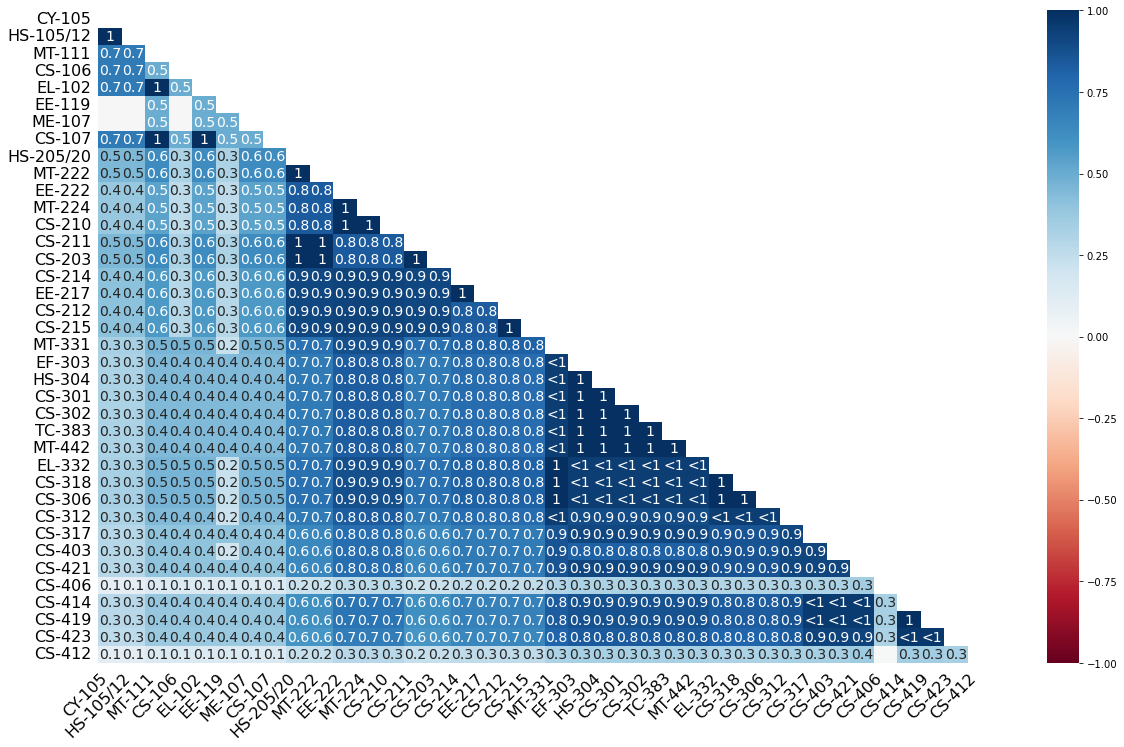

In [12]:
import missingno as msno

# Visualize the correlation between missing values across columns
msno.heatmap(df)
plt.show()

In [13]:
# replace all missing values in object columns with mode (most frequent value)
# select only object columns
df_obj = df.select_dtypes(include=['object'])
df[df_obj.columns] = df[df_obj.columns].fillna(df_obj.mode().iloc[0])

In [14]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [15]:
df

PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
Seat No.                                                                     
CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
CS-97002      A      D     D+         D     B-      C      D      A     D+   
CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   
CS-97006      A     B-      B        D+     C+     A-     C+      B     B+   
CS-97007     B-     C-     A-         D     A-      B      A     B+     A-   
CS-97008     B+     B+     C+         C      C     A-     C-     A-      B   
CS-97009     A-      C     A-        D+      B     A-     A-     A-     B+   
CS-97010      A      B     C+         B      B     A-      C     B-     A-   
CS-97011     A-     B-     B+        C-     C-     B-     C+     B-      A   
CS-97012     A-      C     A-        C+     C-      A     B-     B+     A-   
CS-97013      B      C     A-         C     B-      B     D+      C     B+   
CS-97014      A     C-     A-        C-      B     A-     C+     A-     A-   
CS-97015      A      C     A-        C+     A-      A     B-     A-     A-   
CS-97016     A-     C-     B-         D     B-     B+     B-     A-      B   
CS-97017     A-     C-      A        D+     A-      A      B     A-     A-   
CS-97018     B-     C-      C         D      D     C+     D+      B     B+   
CS-97019      A     C-      A        C+     A-      A     A-      A      A   
CS-97020     B+      C     A-        C-     A-     B+     A-     A-      A   
CS-97021     B+      C      B        D+     B-     C-     C-     C-     C-   
CS-97022      B     B+     B-         C     A-     A-     D+     C+      B   
CS-97023     B+     C+     B-        C+     C-     A-     B-     C+     A-   
CS-97024      A     A-      A        A-      A      A     B-     A-     B+   
CS-97025      A     B-     A-         B     B+     A-      B      A      A   
CS-97026     C+     C-      C        C-      D     B-      D     C+     A-   
CS-97027      A     B+      A        A-     A-      A     C+      A      A   
CS-97028      C     C+     D+        D+     C-     B+      D      C      B   
CS-97029     B+      B     A-        B+     B-      A      B     D+     A-   
CS-97030      C     B-      C        D+      B      B     C+     C+     C+   
CS-97031     A-      B      A        B+     B-     A-     B+      A     A-   
CS-97032      A     C+     A-        C+     B+     A-     B-     B+     A-   
CS-97033      B     C+      A        D+     A-      A     A-      A     A-   
CS-97034      A     C+     A-         B     A-     B+     C-     B+     A-   
CS-97035     B+     B-     A-         A     C+     A-      D     A-     A-   
CS-97036      B     C+     B-        D+     B+     A-     B-     B+     A-   
CS-97037     B+     B+     A-        B-     B+     A-     C+     B+     A-   
CS-97038      B      C     A-        B-     B+      A      A     A-     A-   
CS-97039     C-     C-      D         D     C+     C+     C-      D      C   
CS-97040     A-     A-     B+        B+     A-     A+     B+      A      A   
CS-97041     A-     B-     B-         C     A-      A      A     B-     A-   
CS-97042      B      C     C+         C     D+     A-     D+     B-      B   
CS-97043     B+      C      B         C     B-     A-      D     A-     A-   
CS-97044     C-     B+      C        B+     C+     A-     B+     B-      A   
CS-97045      D      C      A         A     A-     C-     A-     A-     D+   
CS-97046      B     B-     B-        D+     C-      C      D      B     A-   
CS-97047     A-     C-     C+        C-      D     C+     D+     D+     B+   
CS-97048     A-     B+     A-        A-      A     A+      A     A+      A   
CS-97049      A     A-      A        A-     A+     A+     A+      A      A   
CS-97050     A-     A-      A  

<AxesSubplot:ylabel='Seat No.'>

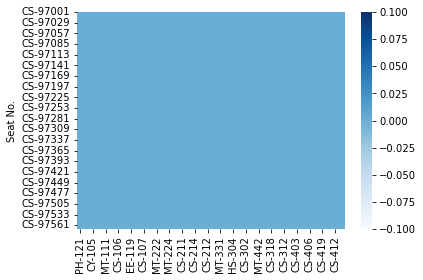

In [16]:
# Lets visualize null values by heatmap

sns.heatmap(df.isnull(), cmap='Blues')

Now there is no null values present in the dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, CS-97001 to CS-97571
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     571 non-null    object 
 3   HS-105/12  571 non-null    object 
 4   MT-111     571 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     571 non-null    object 
 7   EL-102     571 non-null    object 
 8   EE-119     571 non-null    object 
 9   ME-107     571 non-null    object 
 10  CS-107     571 non-null    object 
 11  HS-205/20  571 non-null    object 
 12  MT-222     571 non-null    object 
 13  EE-222     571 non-null    object 
 14  MT-224     571 non-null    object 
 15  CS-210     571 non-null    object 
 16  CS-211     571 non-null    object 
 17  CS-203     571 non-null    object 
 18  CS-214     571 non-null    object 
 19  EE-217     571 non-null    object 
 20  CS-

This gives brief information about the dataset which inclues columns name, non-null values, dtypes,index range, and memory usage.

In [18]:
# check for the value counts of all columns

for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for PH-121:
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


Value counts for HS-101:
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


Value counts for CY-105:
A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


Value counts for HS-105/12:
A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


Value counts for MT-111:
A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


Value counts for CS-105:
A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-  

In [19]:
# loop through each column and print unique values
for col in df.columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())

Unique values in PH-121:
['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']
Unique values in HS-101:
['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']
Unique values in CY-105:
['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 'WU' 'A+' 'F']
Unique values in HS-105/12:
['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' 'WU' 'A+' 'F']
Unique values in MT-111:
['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' 'A+' 'F' 'WU']
Unique values in CS-105:
['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D']
Unique values in CS-106:
['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' 'A+' 'F' 'WU']
Unique values in EL-102:
['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' 'A+' 'WU' 'F']
Unique values in EE-119:
['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'WU' 'A+']
Unique values in ME-107:
['C-' 'D' 'A-' 'C+' 'B+' 'A' 'D+' 'C' 'B' 'B-' 'WU' 'F' 'A+']
Unique values in CS-107:
['C-' 'B+' 'B-' 'D' 'C' 'A-' 'C+' 'D+' 'B' 'A' 'A+' 'I' 'WU' 'F']
Unique values in HS-205/20:
['B+' 'C+' 'A-' 'B' 'A' 'B

# Description Of Dataset

In [20]:
# Statistical description of numerical column

df.describe()

CGPA
count  571.000000
mean     2.954888
std      0.620552
min      0.800000
25%      2.538000
50%      3.029000
75%      3.451000
max      3.985000

Here we can see a statistical summary of the column, including the count, mean, standard deviation, minimum value, maximum value, and quartile values.

Here the output indicates that there are 571 values in the CGPA column, with a mean value of 2.954888 and a standard deviation of 0.620552. The minimum value in the column is 0.8, while the maximum value is 3.985. The quartile values (25th, 50th, and 75th percentiles) are also provided, indicating that 25% of the values are below 2.538, 50% of the values are below 3.029, and 75% of the values are below 3.451

# Data Visualization - Graphical Analysis

Univariate Analysis

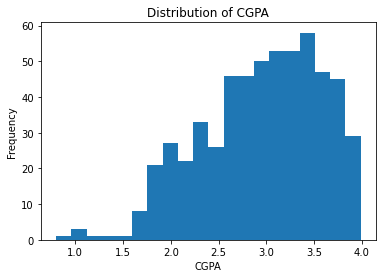

In [21]:
# Lets analyze the CGPA column by Histogram plot

plt.hist(df['CGPA'], bins=20)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

Here we can see that the distribution is left-skewed, meaning that the majority of students have scored CGPA between 2.5 and 3.5, with fewer students scoring above 3.5

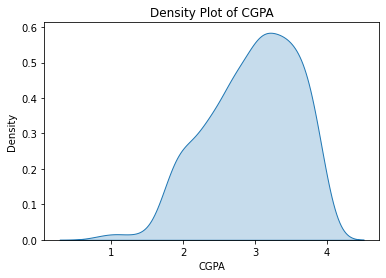

In [22]:
# Lets analyze the CGPA column by density plot

sns.kdeplot(df['CGPA'], shade=True)
plt.title('Density Plot of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Density')
plt.show()

Here we can see that it is left skewed and peak in between 3.0-3.2

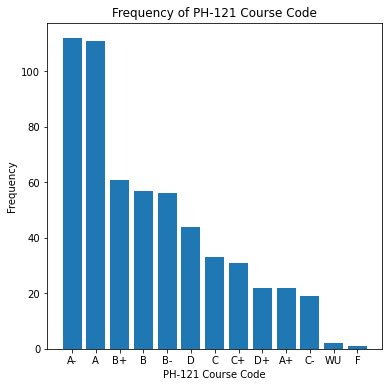

In [23]:
# Lets analyze the PH-121 column using bar plot

plt.figure(figsize=(6,6))
plt.bar(df['PH-121'].value_counts().index, df['PH-121'].value_counts().values)
plt.title('Frequency of PH-121 Course Code')
plt.xlabel('PH-121 Course Code')
plt.ylabel('Frequency')
plt.show()

Here we can see that there is A- grade has the higest frequency followed by A, B+,and B. But here, we can see the big difference between frequency of A and B+. 

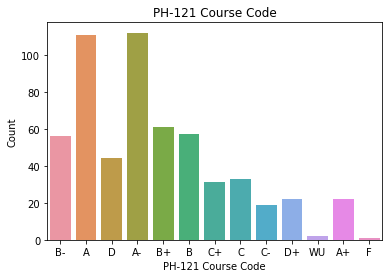

In [24]:
# Lets analyze the PH-121 column using count plot

sns.countplot(x='PH-121', data=df)
plt.title('PH-121 Course Code')
plt.xlabel('PH-121 Course Code')
plt.ylabel('Count')
plt.show()

Here in this plot also we can see the count of A- grade is the highest followed by A. Rest all are almost evenly distributed

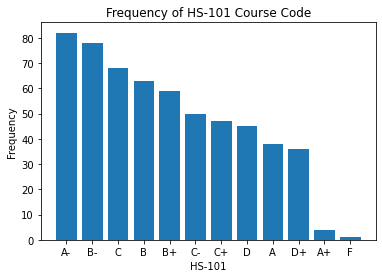

In [25]:
# Lets analyze the HS-101 column using bar plot

plt.bar(df['HS-101'].value_counts().index, df['HS-101'].value_counts().values)
plt.title('Frequency of HS-101 Course Code')
plt.xlabel('HS-101')
plt.ylabel('Frequency')
plt.show()

Here also we can see the A- has the highest frequency followed by B-, and C, although here we can see not much huge difference in the distribution

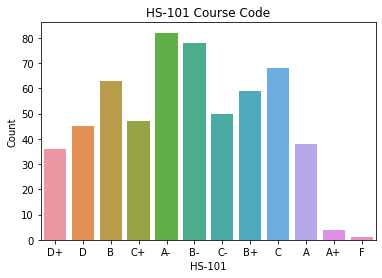

In [26]:
# Lets analyze the HS-101 column using count plot

sns.countplot(x='HS-101', data=df)
plt.title('HS-101 Course Code')
plt.xlabel('HS-101')
plt.ylabel('Count')
plt.show()

Here we can see the count of grades in particular course code. We can see that A- has the highest count followed by B-, and C

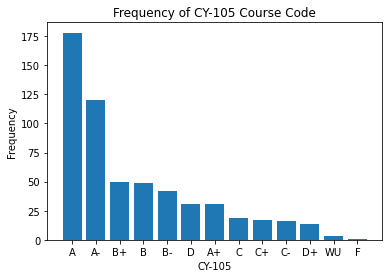

In [27]:
# Lets analyze the CY-105 column using bar plot

plt.bar(df['CY-105'].value_counts().index, df['CY-105'].value_counts().values)
plt.title('Frequency of CY-105 Course Code')
plt.xlabel('CY-105')
plt.ylabel('Frequency')
plt.show()

Here we can see the A has highest frequency followed by A-, B+, and B. There is markable difference between highest frequncy and A-. Rest are almost evenly distributed.

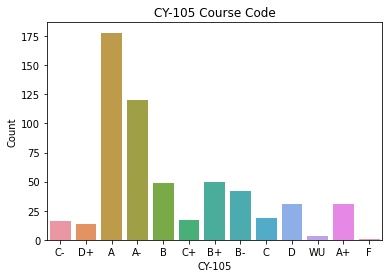

In [28]:
# Lets analyze the CY-105 column using count plot

sns.countplot(x='CY-105', data=df)
plt.title('CY-105 Course Code')
plt.xlabel('CY-105')
plt.ylabel('Count')
plt.show()

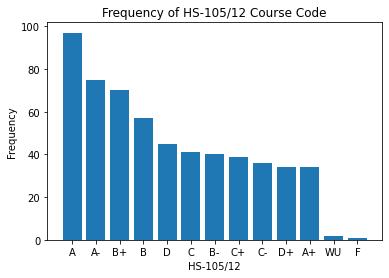

In [29]:
# Lets analyze the HS-105/12 column using bar plot

plt.bar(df['HS-105/12'].value_counts().index, df['HS-105/12'].value_counts().values)
plt.title('Frequency of HS-105/12 Course Code')
plt.xlabel('HS-105/12')
plt.ylabel('Frequency')
plt.show()

Here we can see A grade has highest frequency and rest data is evenly distributed.

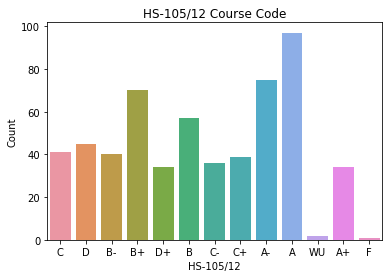

In [30]:
# Lets analyze the HS-105/12 column using count plot

sns.countplot(x='HS-105/12', data=df)
plt.title('HS-105/12 Course Code')
plt.xlabel('HS-105/12')
plt.ylabel('Count')
plt.show()

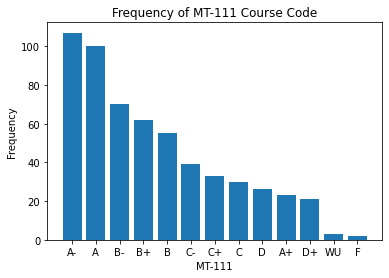

In [31]:
# Lets analyze the MT-111 column using bar plot

plt.bar(df['MT-111'].value_counts().index, df['MT-111'].value_counts().values)
plt.title('Frequency of MT-111 Course Code')
plt.xlabel('MT-111')
plt.ylabel('Frequency')
plt.show()

Here in this plot we can see A- has the highest frequency followed by A 

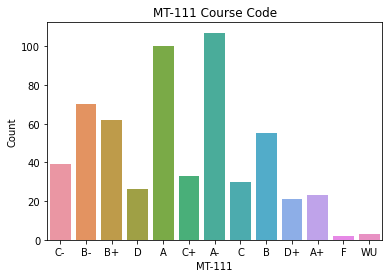

In [32]:
# Lets analyze the MT-111 column using count plot

sns.countplot(x='MT-111', data=df)
plt.title('MT-111 Course Code')
plt.xlabel('MT-111')
plt.ylabel('Count')
plt.show()

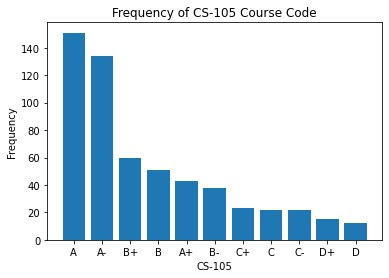

In [33]:
# Lets analyze the CS-105 column using bar plot

plt.bar(df['CS-105'].value_counts().index, df['CS-105'].value_counts().values)
plt.title('Frequency of CS-105 Course Code')
plt.xlabel('CS-105')
plt.ylabel('Frequency')
plt.show()

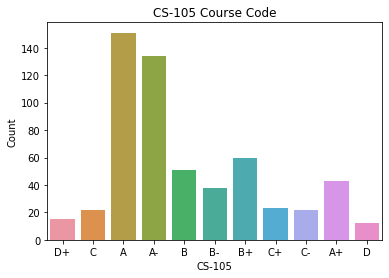

In [34]:
# Lets analyze the CS-105 column using count plot

sns.countplot(x='CS-105', data=df)
plt.title('CS-105 Course Code')
plt.xlabel('CS-105')
plt.ylabel('Count')
plt.show()

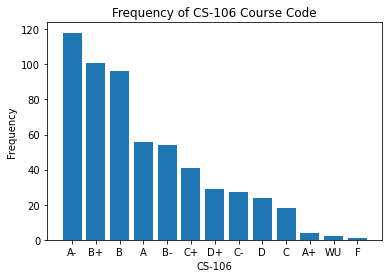

In [35]:
# Lets analyze the CS-106 column using bar plot

plt.bar(df['CS-106'].value_counts().index, df['CS-106'].value_counts().values)
plt.title('Frequency of CS-106 Course Code')
plt.xlabel('CS-106')
plt.ylabel('Frequency')
plt.show()

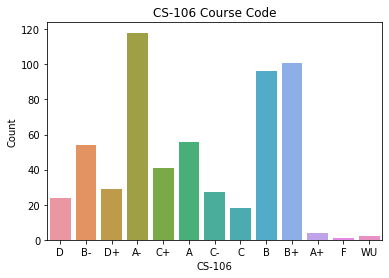

In [36]:
# Lets analyze the CS-106 column using count plot

sns.countplot(x='CS-106', data=df)
plt.title('CS-106 Course Code')
plt.xlabel('CS-106')
plt.ylabel('Count')
plt.show()

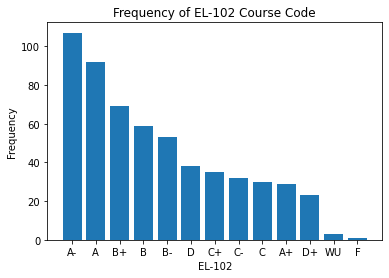

In [37]:
# Lets analyze the EL-102 column using bar plot

plt.bar(df['EL-102'].value_counts().index, df['EL-102'].value_counts().values)
plt.title('Frequency of EL-102 Course Code')
plt.xlabel('EL-102')
plt.ylabel('Frequency')
plt.show()

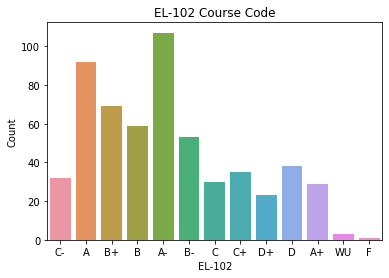

In [38]:
# Lets analyze the EL-102 column using count plot

sns.countplot(x='EL-102', data=df)
plt.title('EL-102 Course Code')
plt.xlabel('EL-102')
plt.ylabel('Count')
plt.show()

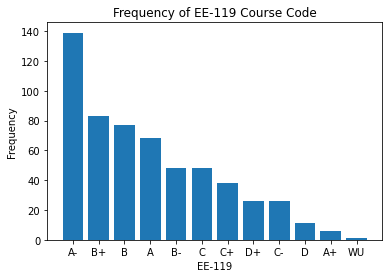

In [39]:
# Lets analyze the EE-119 column using bar plot

plt.bar(df['EE-119'].value_counts().index, df['EE-119'].value_counts().values)
plt.title('Frequency of EE-119 Course Code')
plt.xlabel('EE-119')
plt.ylabel('Frequency')
plt.show()

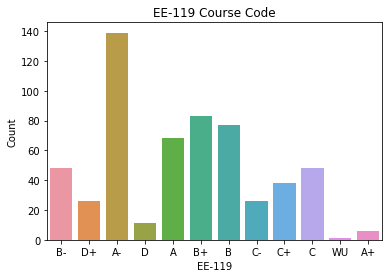

In [40]:
# Lets analyze the EE-119 column using count plot

sns.countplot(x='EE-119', data=df)
plt.title('EE-119 Course Code')
plt.xlabel('EE-119')
plt.ylabel('Count')
plt.show()

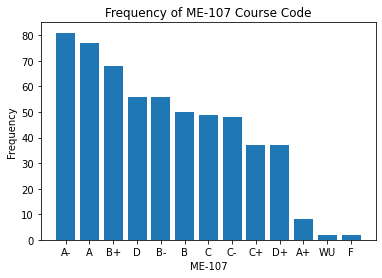

In [41]:
# Lets analyze the ME-107 column using bar plot

plt.bar(df['ME-107'].value_counts().index, df['ME-107'].value_counts().values)
plt.title('Frequency of ME-107 Course Code')
plt.xlabel('ME-107')
plt.ylabel('Frequency')
plt.show()

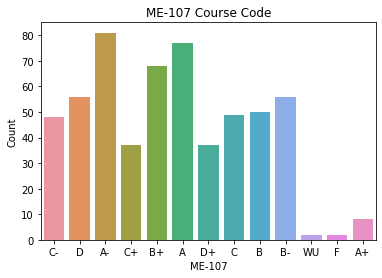

In [42]:
# Lets analyze the ME-107 column using count plot

sns.countplot(x='ME-107', data=df)
plt.title('ME-107 Course Code')
plt.xlabel('ME-107')
plt.ylabel('Count')
plt.show()

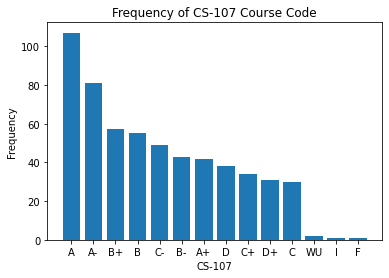

In [43]:
# Lets analyze the CS-107 column using bar plot

plt.bar(df['CS-107'].value_counts().index, df['CS-107'].value_counts().values)
plt.title('Frequency of CS-107 Course Code')
plt.xlabel('CS-107')
plt.ylabel('Frequency')
plt.show()

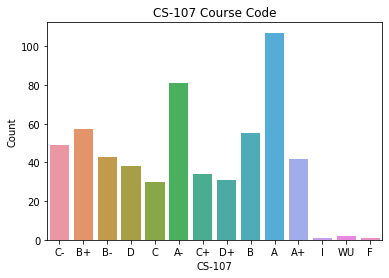

In [44]:
# Lets analyze the CS-107 column using count plot

sns.countplot(x='CS-107', data=df)
plt.title('CS-107 Course Code')
plt.xlabel('CS-107')
plt.ylabel('Count')
plt.show()

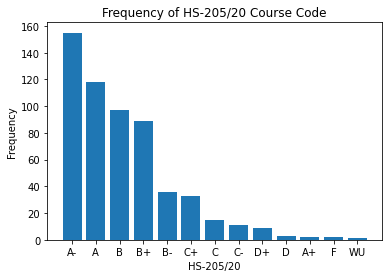

In [45]:
# Lets analyze the HS-205/20 column using bar plot

plt.bar(df['HS-205/20'].value_counts().index, df['HS-205/20'].value_counts().values)
plt.title('Frequency of HS-205/20 Course Code')
plt.xlabel('HS-205/20')
plt.ylabel('Frequency')
plt.show()

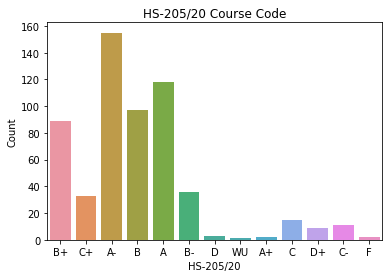

In [46]:
# Lets analyze the HS-205/20 column using count plot

sns.countplot(x='HS-205/20', data=df)
plt.title('HS-205/20 Course Code')
plt.xlabel('HS-205/20')
plt.ylabel('Count')
plt.show()

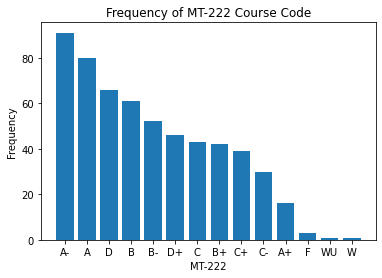

In [47]:
# Lets analyze the MT-222 column using bar plot

plt.bar(df['MT-222'].value_counts().index, df['MT-222'].value_counts().values)
plt.title('Frequency of MT-222 Course Code')
plt.xlabel('MT-222')
plt.ylabel('Frequency')
plt.show()

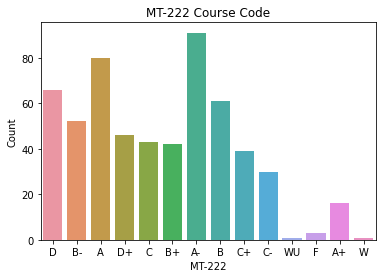

In [48]:
# Lets analyze the MT-222 column using count plot

sns.countplot(x='MT-222', data=df)
plt.title('MT-222 Course Code')
plt.xlabel('MT-222')
plt.ylabel('Count')
plt.show()

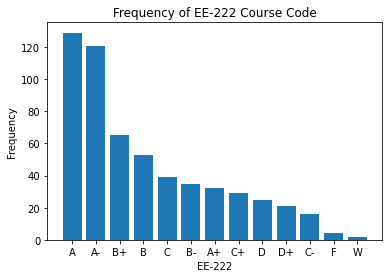

In [49]:
# Lets analyze the EE-222 column using bar plot

plt.bar(df['EE-222'].value_counts().index, df['EE-222'].value_counts().values)
plt.title('Frequency of EE-222 Course Code')
plt.xlabel('EE-222')
plt.ylabel('Frequency')
plt.show()

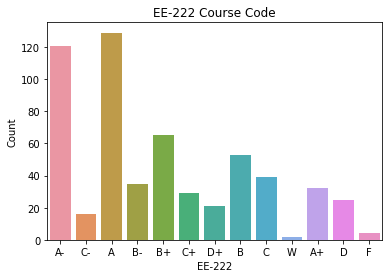

In [50]:
# Lets analyze the EE-222 column using count plot

sns.countplot(x='EE-222', data=df)
plt.title('EE-222 Course Code')
plt.xlabel('EE-222')
plt.ylabel('Count')
plt.show()

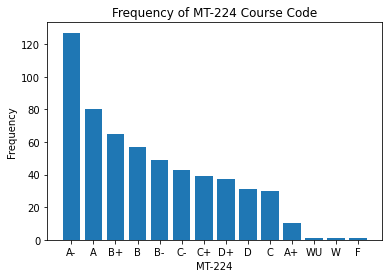

In [51]:
# Lets analyze the MT-224 column using bar plot

plt.bar(df['MT-224'].value_counts().index, df['MT-224'].value_counts().values)
plt.title('Frequency of MT-224 Course Code')
plt.xlabel('MT-224')
plt.ylabel('Frequency')
plt.show()

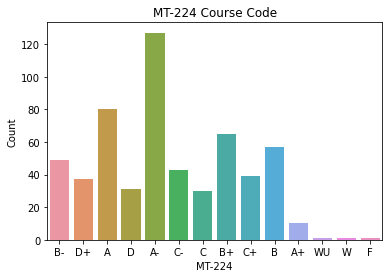

In [52]:
# Lets analyze the MT-224 column using count plot

sns.countplot(x='MT-224', data=df)
plt.title('MT-224 Course Code')
plt.xlabel('MT-224')
plt.ylabel('Count')
plt.show()

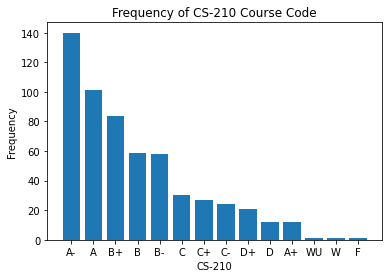

In [53]:
# Lets analyze the CS-210 column using bar plot

plt.bar(df['CS-210'].value_counts().index, df['CS-210'].value_counts().values)
plt.title('Frequency of CS-210 Course Code')
plt.xlabel('CS-210')
plt.ylabel('Frequency')
plt.show()

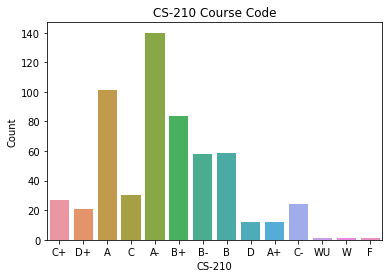

In [54]:
# Lets analyze the CS-210 column using count plot

sns.countplot(x='CS-210', data=df)
plt.title('CS-210 Course Code')
plt.xlabel('CS-210')
plt.ylabel('Count')
plt.show()

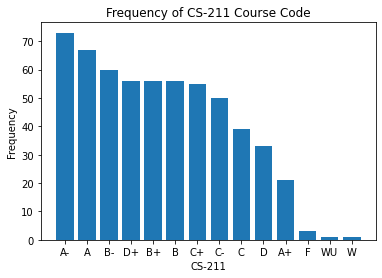

In [55]:
# Lets analyze the CS-211 column using bar plot

plt.bar(df['CS-211'].value_counts().index, df['CS-211'].value_counts().values)
plt.title('Frequency of CS-211 Course Code')
plt.xlabel('CS-211')
plt.ylabel('Frequency')
plt.show()

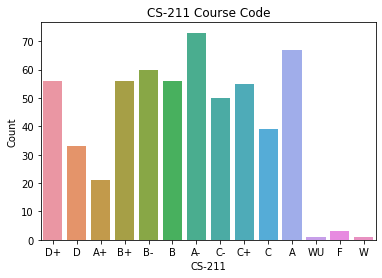

In [56]:
# Lets analyze the CS-211 column using count plot

sns.countplot(x='CS-211', data=df)
plt.title('CS-211 Course Code')
plt.xlabel('CS-211')
plt.ylabel('Count')
plt.show()

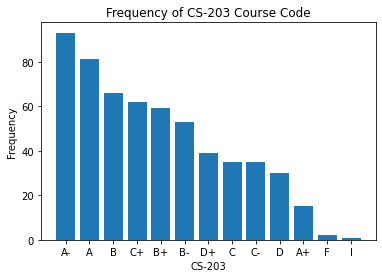

In [57]:
# Lets analyze the CS-203 column using bar plot

plt.bar(df['CS-203'].value_counts().index, df['CS-203'].value_counts().values)
plt.title('Frequency of CS-203 Course Code')
plt.xlabel('CS-203')
plt.ylabel('Frequency')
plt.show()

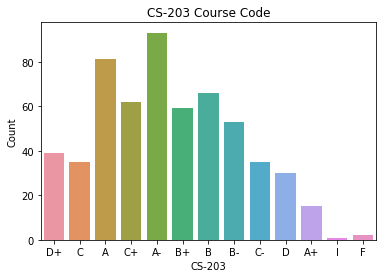

In [58]:
# Lets analyze the CS-203 column using count plot

sns.countplot(x='CS-203', data=df)
plt.title('CS-203 Course Code')
plt.xlabel('CS-203')
plt.ylabel('Count')
plt.show()

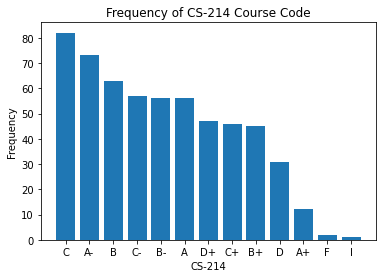

In [59]:
# Lets analyze the CS-214 column using bar plot

plt.bar(df['CS-214'].value_counts().index, df['CS-214'].value_counts().values)
plt.title('Frequency of CS-214 Course Code')
plt.xlabel('CS-214')
plt.ylabel('Frequency')
plt.show()

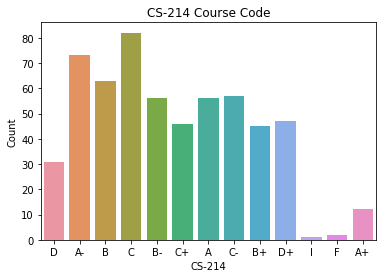

In [60]:
# Lets analyze the CS-214 column using count plot

sns.countplot(x='CS-214', data=df)
plt.title('CS-214 Course Code')
plt.xlabel('CS-214')
plt.ylabel('Count')
plt.show()

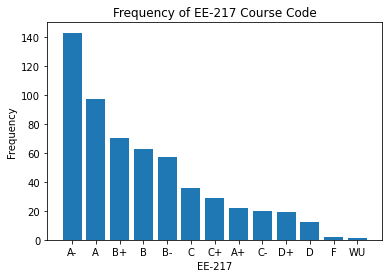

In [61]:
# Lets analyze the EE-217 column using bar plot

plt.bar(df['EE-217'].value_counts().index, df['EE-217'].value_counts().values)
plt.title('Frequency of EE-217 Course Code')
plt.xlabel('EE-217')
plt.ylabel('Frequency')
plt.show()

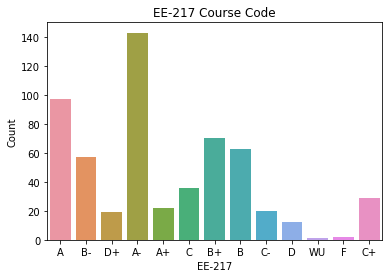

In [62]:
# Lets analyze the EE-217 column using count plot

sns.countplot(x='EE-217', data=df)
plt.title('EE-217 Course Code')
plt.xlabel('EE-217')
plt.ylabel('Count')
plt.show()

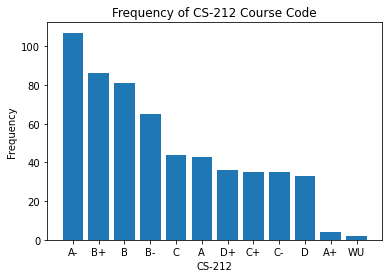

In [63]:
# Lets analyze the CS-212 column using bar plot

plt.bar(df['CS-212'].value_counts().index, df['CS-212'].value_counts().values)
plt.title('Frequency of CS-212 Course Code')
plt.xlabel('CS-212')
plt.ylabel('Frequency')
plt.show()

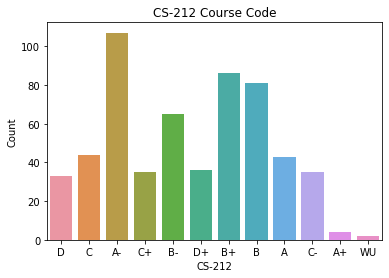

In [64]:
# Lets analyze the CS-212 column using count plot

sns.countplot(x='CS-212', data=df)
plt.title('CS-212 Course Code')
plt.xlabel('CS-212')
plt.ylabel('Count')
plt.show()

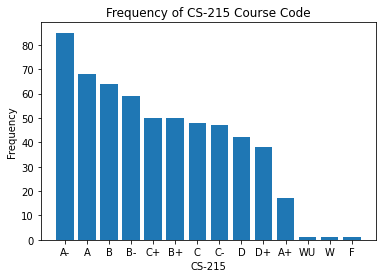

In [65]:
# Lets analyze the CS-215 column using bar plot

plt.bar(df['CS-215'].value_counts().index, df['CS-215'].value_counts().values)
plt.title('Frequency of CS-215 Course Code')
plt.xlabel('CS-215')
plt.ylabel('Frequency')
plt.show()

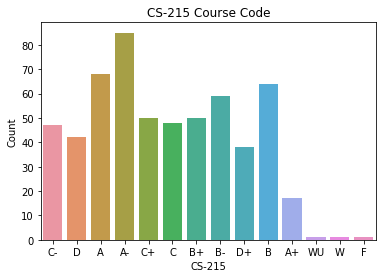

In [66]:
# Lets analyze the CS-215 column using count plot

sns.countplot(x='CS-215', data=df)
plt.title('CS-215 Course Code')
plt.xlabel('CS-215')
plt.ylabel('Count')
plt.show()

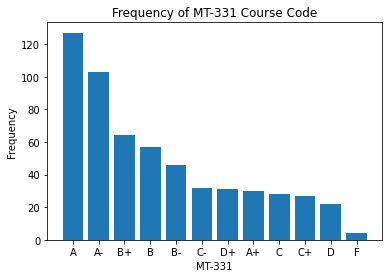

In [67]:
# Lets analyze the MT-331 column using bar plot

plt.bar(df['MT-331'].value_counts().index, df['MT-331'].value_counts().values)
plt.title('Frequency of MT-331 Course Code')
plt.xlabel('MT-331')
plt.ylabel('Frequency')
plt.show()

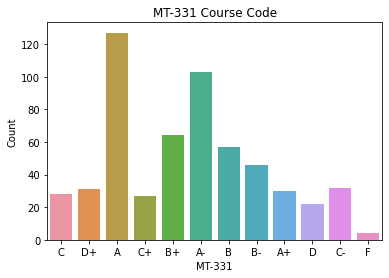

In [68]:
# Lets analyze the MT-331 column using count plot

sns.countplot(x='MT-331', data=df)
plt.title('MT-331 Course Code')
plt.xlabel('MT-331')
plt.ylabel('Count')
plt.show()

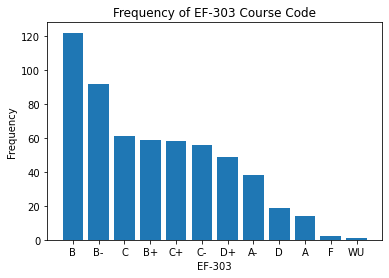

In [69]:
# Lets analyze the EF-303 column using bar plot

plt.bar(df['EF-303'].value_counts().index, df['EF-303'].value_counts().values)
plt.title('Frequency of EF-303 Course Code')
plt.xlabel('EF-303')
plt.ylabel('Frequency')
plt.show()

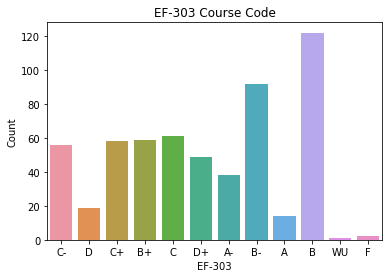

In [70]:
# Lets analyze the EF-303 column using count plot

sns.countplot(x='EF-303', data=df)
plt.title('EF-303 Course Code')
plt.xlabel('EF-303')
plt.ylabel('Count')
plt.show()

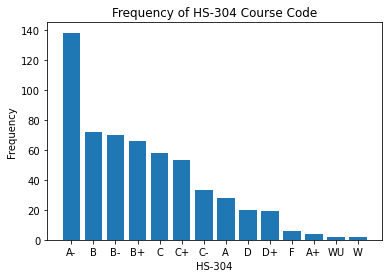

In [71]:
# Lets analyze the HS-304 column using bar plot

plt.bar(df['HS-304'].value_counts().index, df['HS-304'].value_counts().values)
plt.title('Frequency of HS-304 Course Code')
plt.xlabel('HS-304')
plt.ylabel('Frequency')
plt.show()

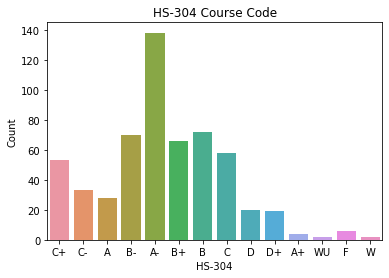

In [72]:
# Lets analyze the HS-304 column using count plot

sns.countplot(x='HS-304', data=df)
plt.title('HS-304 Course Code')
plt.xlabel('HS-304')
plt.ylabel('Count')
plt.show()

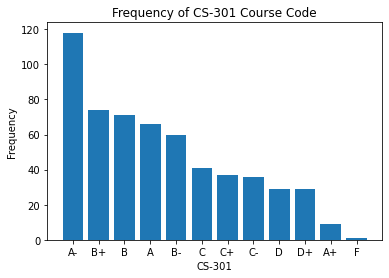

In [73]:
# Lets analyze the CS-301 column using bar plot

plt.bar(df['CS-301'].value_counts().index, df['CS-301'].value_counts().values)
plt.title('Frequency of CS-301 Course Code')
plt.xlabel('CS-301')
plt.ylabel('Frequency')
plt.show()

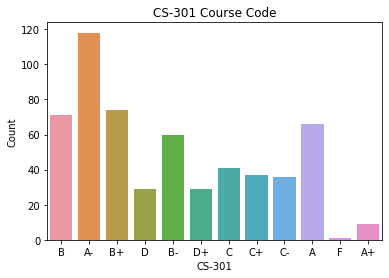

In [74]:
# Lets analyze the CS-301 column using count plot

sns.countplot(x='CS-301', data=df)
plt.title('CS-301 Course Code')
plt.xlabel('CS-301')
plt.ylabel('Count')
plt.show()

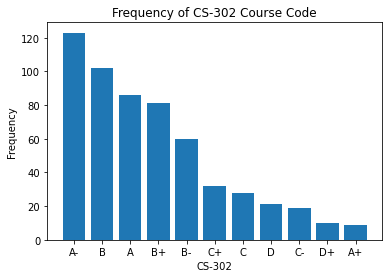

In [75]:
# Lets analyze the CS-302 column using bar plot

plt.bar(df['CS-302'].value_counts().index, df['CS-302'].value_counts().values)
plt.title('Frequency of CS-302 Course Code')
plt.xlabel('CS-302')
plt.ylabel('Frequency')
plt.show()

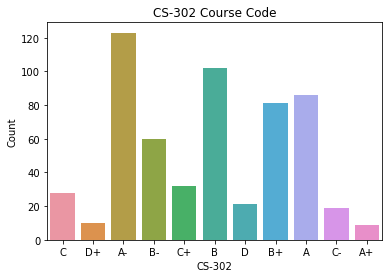

In [76]:
# Lets analyze the CS-302 column using count plot

sns.countplot(x='CS-302', data=df)
plt.title('CS-302 Course Code')
plt.xlabel('CS-302')
plt.ylabel('Count')
plt.show()

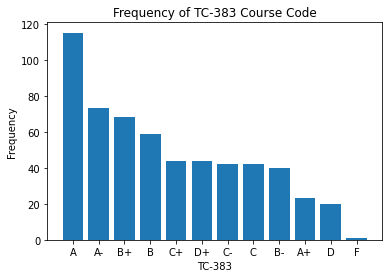

In [77]:
# Lets analyze the TC-383 column using bar plot

plt.bar(df['TC-383'].value_counts().index, df['TC-383'].value_counts().values)
plt.title('Frequency of TC-383 Course Code')
plt.xlabel('TC-383')
plt.ylabel('Frequency')
plt.show()

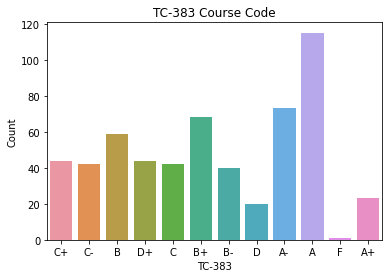

In [78]:
# Lets analyze the TC-383 column using count plot

sns.countplot(x='TC-383', data=df)
plt.title('TC-383 Course Code')
plt.xlabel('TC-383')
plt.ylabel('Count')
plt.show()

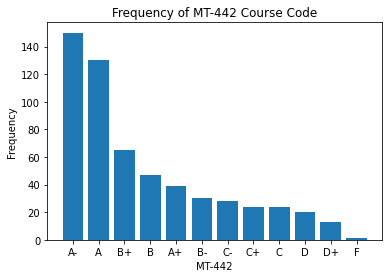

In [79]:
# Lets analyze the MT-442 column using bar plot

plt.bar(df['MT-442'].value_counts().index, df['MT-442'].value_counts().values)
plt.title('Frequency of MT-442 Course Code')
plt.xlabel('MT-442')
plt.ylabel('Frequency')
plt.show()

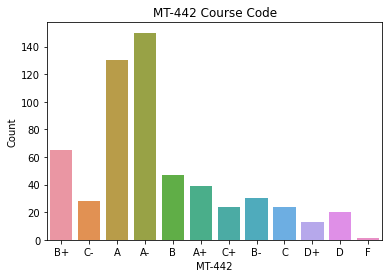

In [80]:
# Lets analyze the MT-442 column using count plot

sns.countplot(x='MT-442', data=df)
plt.title('MT-442 Course Code')
plt.xlabel('MT-442')
plt.ylabel('Count')
plt.show()

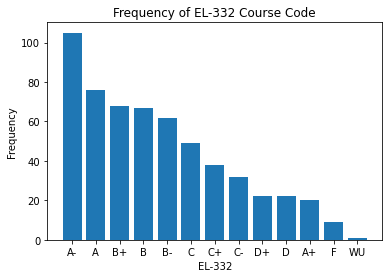

In [81]:
# Lets analyze the EL-332 column using bar plot

plt.bar(df['EL-332'].value_counts().index, df['EL-332'].value_counts().values)
plt.title('Frequency of EL-332 Course Code')
plt.xlabel('EL-332')
plt.ylabel('Frequency')
plt.show()

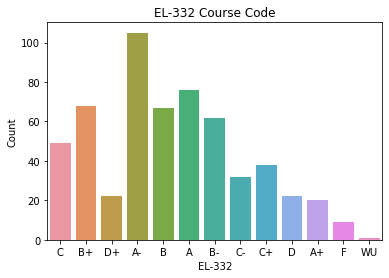

In [82]:
# Lets analyze the EL-332 column using count plot

sns.countplot(x='EL-332', data=df)
plt.title('EL-332 Course Code')
plt.xlabel('EL-332')
plt.ylabel('Count')
plt.show()

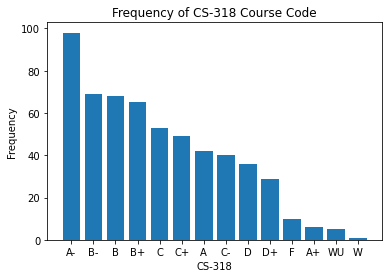

In [83]:
# Lets analyze the CS-318 column using bar plot

plt.bar(df['CS-318'].value_counts().index, df['CS-318'].value_counts().values)
plt.title('Frequency of CS-318 Course Code')
plt.xlabel('CS-318')
plt.ylabel('Frequency')
plt.show()

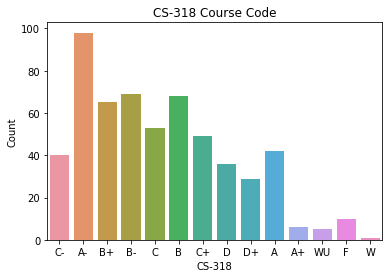

In [84]:
# Lets analyze the CS-318 column using count plot

sns.countplot(x='CS-318', data=df)
plt.title('CS-318 Course Code')
plt.xlabel('CS-318')
plt.ylabel('Count')
plt.show()

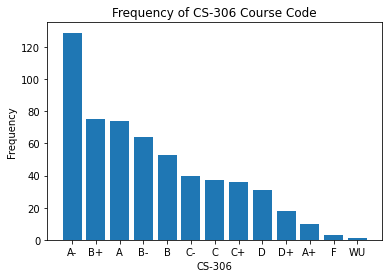

In [85]:
# Lets analyze the CS-306 column using bar plot

plt.bar(df['CS-306'].value_counts().index, df['CS-306'].value_counts().values)
plt.title('Frequency of CS-306 Course Code')
plt.xlabel('CS-306')
plt.ylabel('Frequency')
plt.show()

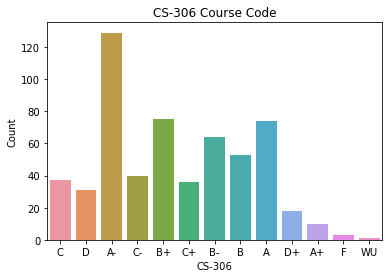

In [86]:
# Lets analyze the CS-306 column using count plot

sns.countplot(x='CS-306', data=df)
plt.title('CS-306 Course Code')
plt.xlabel('CS-306')
plt.ylabel('Count')
plt.show()

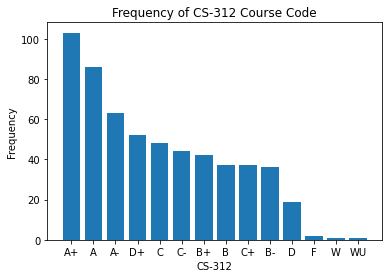

In [87]:
# Lets analyze the CS-312 column using bar plot

plt.bar(df['CS-312'].value_counts().index, df['CS-312'].value_counts().values)
plt.title('Frequency of CS-312 Course Code')
plt.xlabel('CS-312')
plt.ylabel('Frequency')
plt.show()

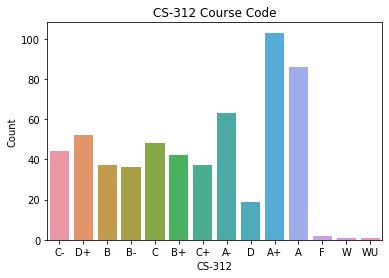

In [88]:
# Lets analyze the CS-312 column using count plot

sns.countplot(x='CS-312', data=df)
plt.title('CS-312 Course Code')
plt.xlabel('CS-312')
plt.ylabel('Count')
plt.show()

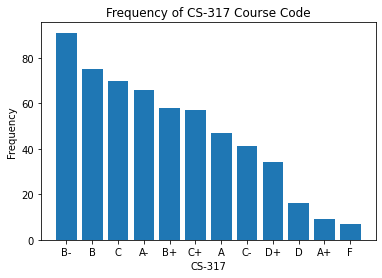

In [89]:
# Lets analyze the CS-317 column using bar plot

plt.bar(df['CS-317'].value_counts().index, df['CS-317'].value_counts().values)
plt.title('Frequency of CS-317 Course Code')
plt.xlabel('CS-317')
plt.ylabel('Frequency')
plt.show()

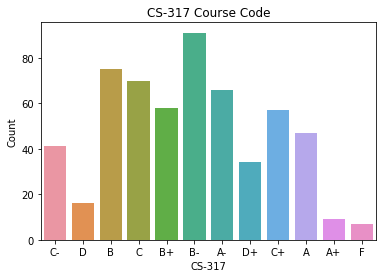

In [90]:
# Lets analyze the CS-317 column using count plot

sns.countplot(x='CS-317', data=df)
plt.title('CS-317 Course Code')
plt.xlabel('CS-317')
plt.ylabel('Count')
plt.show()

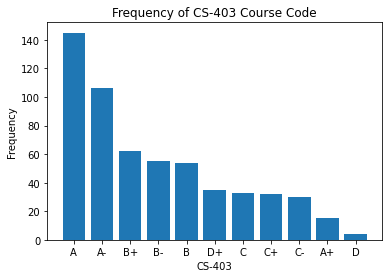

In [91]:
# Lets analyze the CS-403 column using bar plot

plt.bar(df['CS-403'].value_counts().index, df['CS-403'].value_counts().values)
plt.title('Frequency of CS-403 Course Code')
plt.xlabel('CS-403')
plt.ylabel('Frequency')
plt.show()

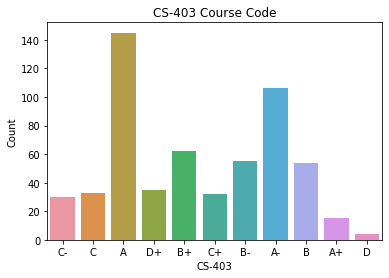

In [92]:
# Lets analyze the CS-403 column using count plot

sns.countplot(x='CS-403', data=df)
plt.title('CS-403 Course Code')
plt.xlabel('CS-403')
plt.ylabel('Count')
plt.show()

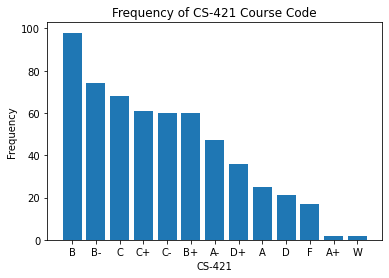

In [93]:
# Lets analyze the CS-421 column using bar plot

plt.bar(df['CS-421'].value_counts().index, df['CS-421'].value_counts().values)
plt.title('Frequency of CS-421 Course Code')
plt.xlabel('CS-421')
plt.ylabel('Frequency')
plt.show()

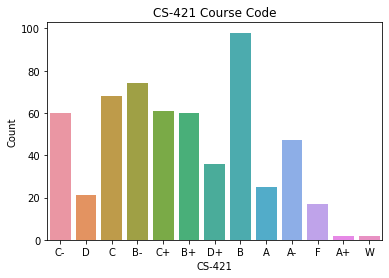

In [94]:
# Lets analyze the CS-421 column using count plot

sns.countplot(x='CS-421', data=df)
plt.title('CS-421 Course Code')
plt.xlabel('CS-421')
plt.ylabel('Count')
plt.show()

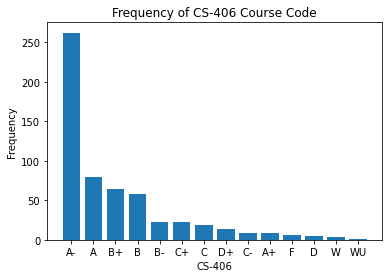

In [95]:
# Lets analyze the CS-406 column using bar plot

plt.bar(df['CS-406'].value_counts().index, df['CS-406'].value_counts().values)
plt.title('Frequency of CS-406 Course Code')
plt.xlabel('CS-406')
plt.ylabel('Frequency')
plt.show()

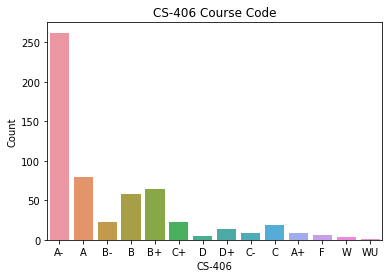

In [96]:
# Lets analyze the CS-406 column using count plot

sns.countplot(x='CS-406', data=df)
plt.title('CS-406 Course Code')
plt.xlabel('CS-406')
plt.ylabel('Count')
plt.show()

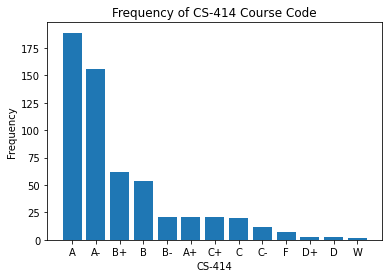

In [97]:
# Lets analyze the CS-414 column using bar plot

plt.bar(df['CS-414'].value_counts().index, df['CS-414'].value_counts().values)
plt.title('Frequency of CS-414 Course Code')
plt.xlabel('CS-414')
plt.ylabel('Frequency')
plt.show()

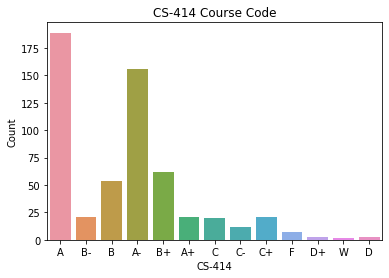

In [98]:
# Lets analyze the CS-203 column using count plot

sns.countplot(x='CS-414', data=df)
plt.title('CS-414 Course Code')
plt.xlabel('CS-414')
plt.ylabel('Count')
plt.show()

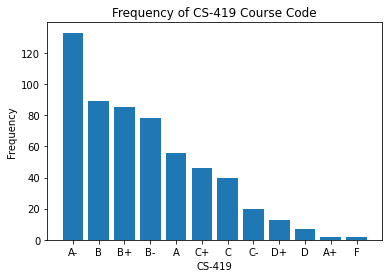

In [99]:
# Lets analyze the CS-419 column using bar plot

plt.bar(df['CS-419'].value_counts().index, df['CS-419'].value_counts().values)
plt.title('Frequency of CS-419 Course Code')
plt.xlabel('CS-419')
plt.ylabel('Frequency')
plt.show()

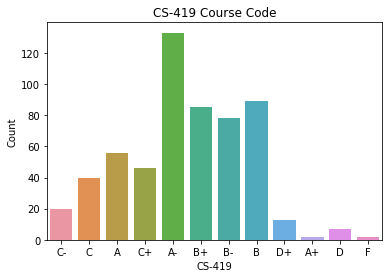

In [100]:
# Lets analyze the CS-419 column using count plot

sns.countplot(x='CS-419', data=df)
plt.title('CS-419 Course Code')
plt.xlabel('CS-419')
plt.ylabel('Count')
plt.show()

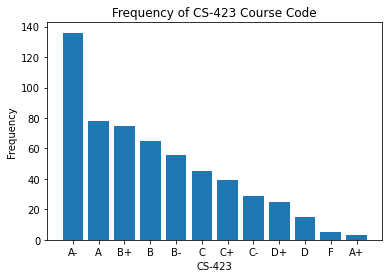

In [101]:
# Lets analyze the CS-423 column using bar plot

plt.bar(df['CS-423'].value_counts().index, df['CS-423'].value_counts().values)
plt.title('Frequency of CS-423 Course Code')
plt.xlabel('CS-423')
plt.ylabel('Frequency')
plt.show()

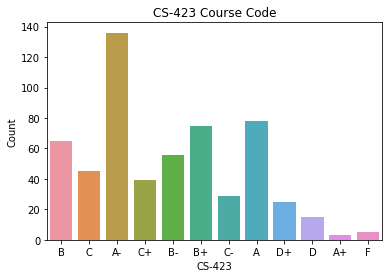

In [102]:
# Lets analyze the CS-423 column using count plot

sns.countplot(x='CS-423', data=df)
plt.title('CS-423 Course Code')
plt.xlabel('CS-423')
plt.ylabel('Count')
plt.show()

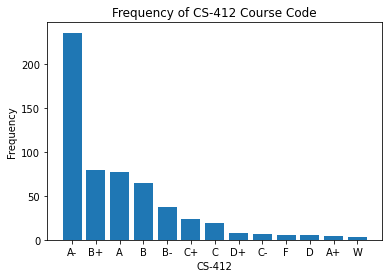

In [103]:
# Lets analyze the CS-412 column using bar plot

plt.bar(df['CS-412'].value_counts().index, df['CS-412'].value_counts().values)
plt.title('Frequency of CS-412 Course Code')
plt.xlabel('CS-412')
plt.ylabel('Frequency')
plt.show()

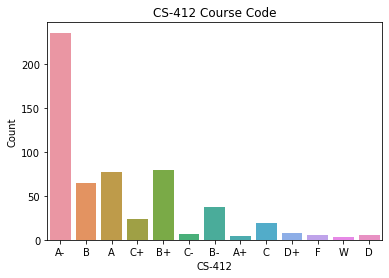

In [104]:
# Lets analyze the CS-412 column using count plot

sns.countplot(x='CS-412', data=df)
plt.title('CS-412 Course Code')
plt.xlabel('CS-412')
plt.ylabel('Count')
plt.show()

In above all plots, which is a univariate analysis, the distribution of grades according to frequency and counts, where in maximum plots A- has the highest bar.

Bivariate Analysis

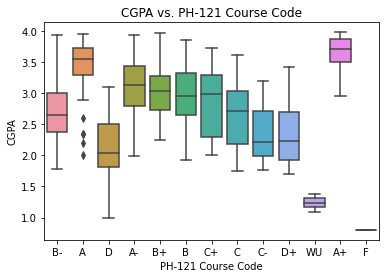

In [105]:
# lets analyze the relation between CGPA and PH-121 by boxplot

sns.boxplot(x='PH-121', y='CGPA', data=df)
plt.title('CGPA vs. PH-121 Course Code')
plt.xlabel('PH-121 Course Code')
plt.ylabel('CGPA')
plt.show()

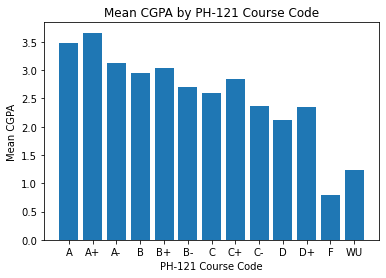

In [106]:
# lets analyze the relation between CGPA and PH-121 by barplot

# Calculate mean CGPA for each value of PH-121
means = df.groupby('PH-121')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by PH-121 Course Code')
plt.xlabel('PH-121 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

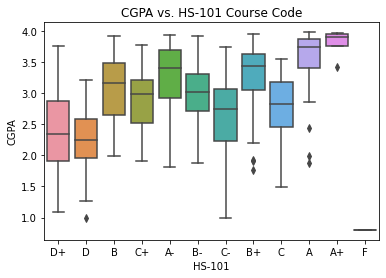

In [107]:
# lets analyze the relation between CGPA and HS-101 by box plot

sns.boxplot(x='HS-101', y='CGPA', data=df)
plt.title('CGPA vs. HS-101 Course Code')
plt.xlabel('HS-101')
plt.ylabel('CGPA')
plt.show()

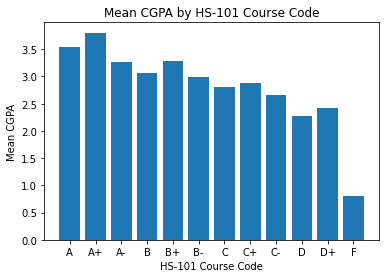

In [108]:
# lets analyze the relation between CGPA and HS-101 by barplot

# Calculate mean CGPA for each value of HS-101
means = df.groupby('HS-101')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by HS-101 Course Code')
plt.xlabel('HS-101 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

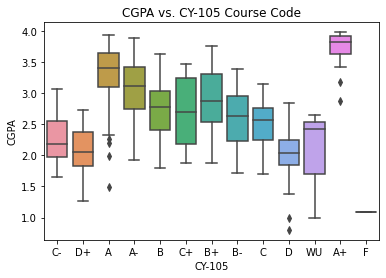

In [109]:
# lets analyze the relation between CGPA and CY-105 by box plot

sns.boxplot(x='CY-105', y='CGPA', data=df)
plt.title('CGPA vs. CY-105 Course Code')
plt.xlabel('CY-105')
plt.ylabel('CGPA')
plt.show()

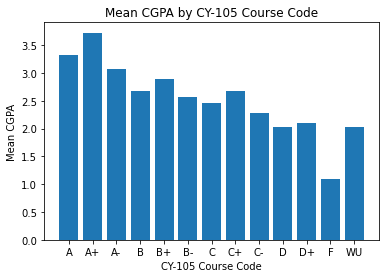

In [110]:
# lets analyze the relation between CGPA and CY-105 by barplot

# Calculate mean CGPA for each value of CY-105
means = df.groupby('CY-105')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CY-105 Course Code')
plt.xlabel('CY-105 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

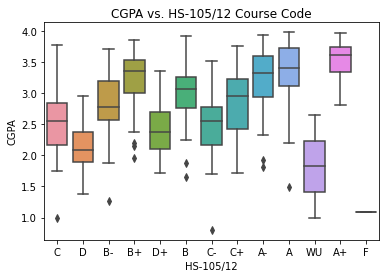

In [111]:
# lets analyze the relation between CGPA and HS-105/12 by box plot

sns.boxplot(x='HS-105/12', y='CGPA', data=df)
plt.title('CGPA vs. HS-105/12 Course Code')
plt.xlabel('HS-105/12')
plt.ylabel('CGPA')
plt.show()

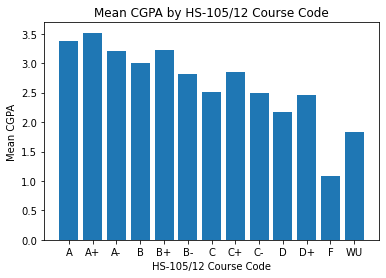

In [112]:
# lets analyze the relation between CGPA and HS-105/12 by barplot

# Calculate mean CGPA for each value of HS-105/12
means = df.groupby('HS-105/12')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by HS-105/12 Course Code')
plt.xlabel('HS-105/12 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

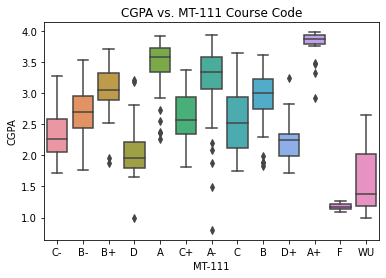

In [113]:
# lets analyze the relation between CGPA and MT-111 by box plot

sns.boxplot(x='MT-111', y='CGPA', data=df)
plt.title('CGPA vs. MT-111 Course Code')
plt.xlabel('MT-111')
plt.ylabel('CGPA')
plt.show()

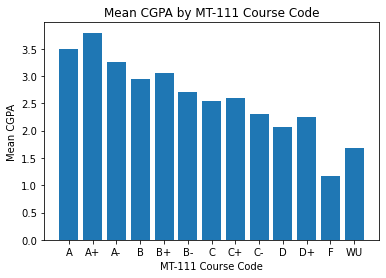

In [114]:
# lets analyze the relation between CGPA and MT-111 by barplot

# Calculate mean CGPA for each value of MT-111
means = df.groupby('MT-111')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by MT-111 Course Code')
plt.xlabel('MT-111 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

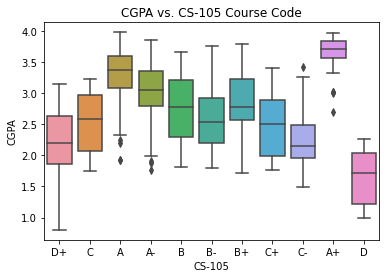

In [115]:
# lets analyze the relation between CGPA and CS-105 by box plot

sns.boxplot(x='CS-105', y='CGPA', data=df)
plt.title('CGPA vs. CS-105 Course Code')
plt.xlabel('CS-105')
plt.ylabel('CGPA')
plt.show()

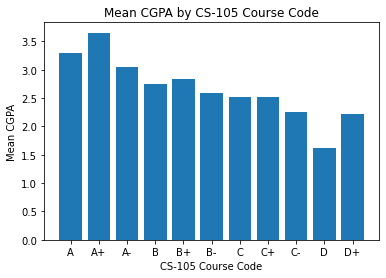

In [116]:
# lets analyze the relation between CGPA and CS-105 by barplot

# Calculate mean CGPA for each value of CS-105
means = df.groupby('CS-105')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-105 Course Code')
plt.xlabel('CS-105 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

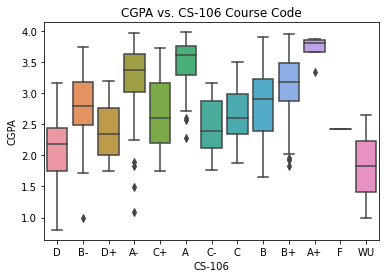

In [117]:
# lets analyze the relation between CGPA and CS-106 by box plot

sns.boxplot(x='CS-106', y='CGPA', data=df)
plt.title('CGPA vs. CS-106 Course Code')
plt.xlabel('CS-106')
plt.ylabel('CGPA')
plt.show()

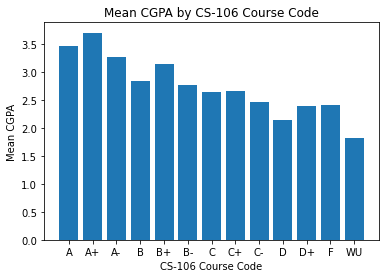

In [118]:
# lets analyze the relation between CGPA and CS-106 by barplot

# Calculate mean CGPA for each value of CS-106
means = df.groupby('CS-106')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-106 Course Code')
plt.xlabel('CS-106 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

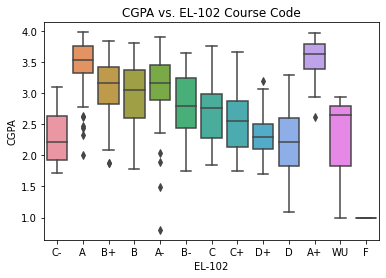

In [119]:
# lets analyze the relation between CGPA and EL-102 by box plot

sns.boxplot(x='EL-102', y='CGPA', data=df)
plt.title('CGPA vs. EL-102 Course Code')
plt.xlabel('EL-102')
plt.ylabel('CGPA')
plt.show()

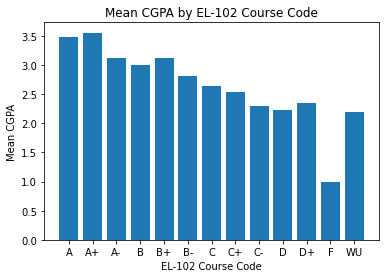

In [120]:
# lets analyze the relation between CGPA and EL-102 by barplot

# Calculate mean CGPA for each value of EL-102
means = df.groupby('EL-102')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by EL-102 Course Code')
plt.xlabel('EL-102 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

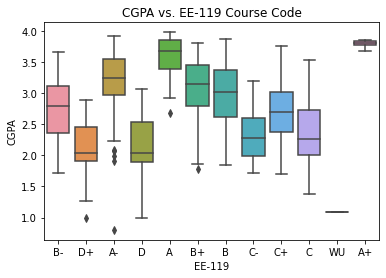

In [121]:
# lets analyze the relation between CGPA and EE-119 by box plot

sns.boxplot(x='EE-119', y='CGPA', data=df)
plt.title('CGPA vs. EE-119 Course Code')
plt.xlabel('EE-119')
plt.ylabel('CGPA')
plt.show()

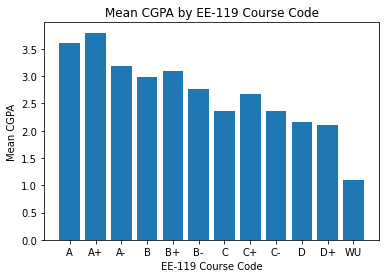

In [122]:
# lets analyze the relation between CGPA and EE-119 by barplot

# Calculate mean CGPA for each value of EE-119
means = df.groupby('EE-119')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by EE-119 Course Code')
plt.xlabel('EE-119 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

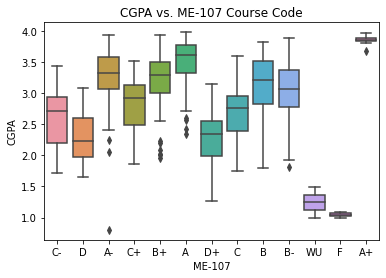

In [123]:
# lets analyze the relation between CGPA and ME-107 by box plot

sns.boxplot(x='ME-107', y='CGPA', data=df)
plt.title('CGPA vs. ME-107 Course Code')
plt.xlabel('ME-107')
plt.ylabel('CGPA')
plt.show()

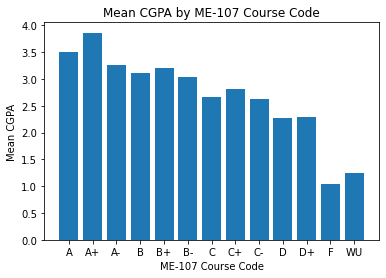

In [124]:
# lets analyze the relation between CGPA and ME-107 by barplot

# Calculate mean CGPA for each value of ME-107
means = df.groupby('ME-107')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by ME-107 Course Code')
plt.xlabel('ME-107 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

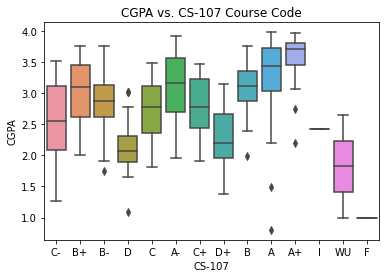

In [125]:
# lets analyze the relation between CGPA and CS-107 by box plot

sns.boxplot(x='CS-107', y='CGPA', data=df)
plt.title('CGPA vs. CS-107 Course Code')
plt.xlabel('CS-107')
plt.ylabel('CGPA')
plt.show()

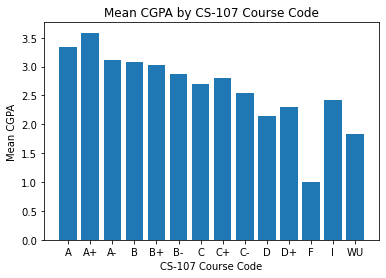

In [126]:
# lets analyze the relation between CGPA and CS-107 by barplot

# Calculate mean CGPA for each value of CS-107
means = df.groupby('CS-107')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-107 Course Code')
plt.xlabel('CS-107 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

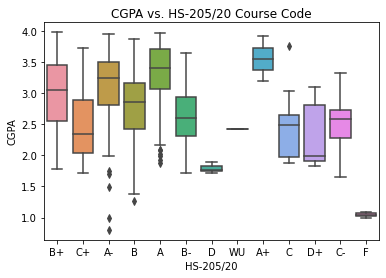

In [127]:
# lets analyze the relation between CGPA and HS-205/20 by box plot

sns.boxplot(x='HS-205/20', y='CGPA', data=df)
plt.title('CGPA vs. HS-205/20 Course Code')
plt.xlabel('HS-205/20')
plt.ylabel('CGPA')
plt.show()

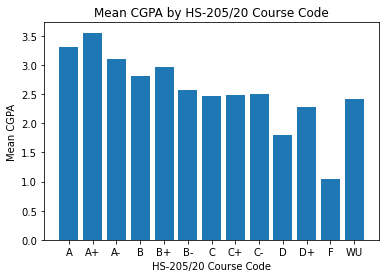

In [128]:
# lets analyze the relation between CGPA and HS-205/20 by barplot

# Calculate mean CGPA for each value of HS-205/20
means = df.groupby('HS-205/20')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by HS-205/20 Course Code')
plt.xlabel('HS-205/20 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

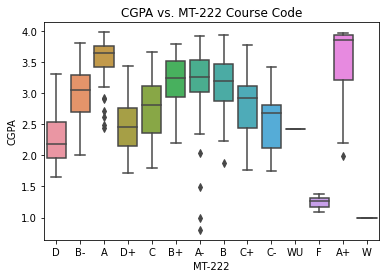

In [129]:
# lets analyze the relation between CGPA and MT-222 by box plot

sns.boxplot(x='MT-222', y='CGPA', data=df)
plt.title('CGPA vs. MT-222 Course Code')
plt.xlabel('MT-222')
plt.ylabel('CGPA')
plt.show()

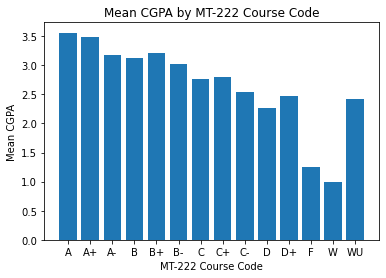

In [130]:
# lets analyze the relation between CGPA and MT-222 by barplot

# Calculate mean CGPA for each value of MT-222
means = df.groupby('MT-222')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by MT-222 Course Code')
plt.xlabel('MT-222 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

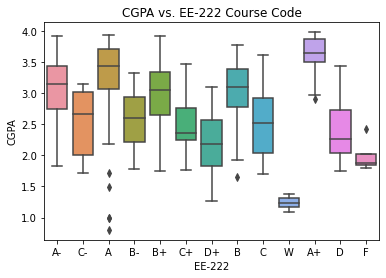

In [131]:
# lets analyze the relation between CGPA and EE-222 by box plot

sns.boxplot(x='EE-222', y='CGPA', data=df)
plt.title('CGPA vs. EE-222 Course Code')
plt.xlabel('EE-222')
plt.ylabel('CGPA')
plt.show()

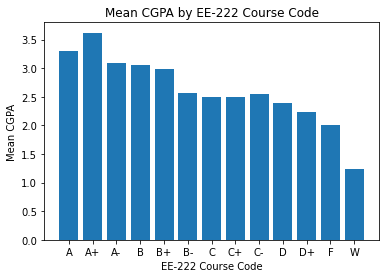

In [132]:
# lets analyze the relation between CGPA and EE-222 by barplot

# Calculate mean CGPA for each value of EE-222
means = df.groupby('EE-222')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by EE-222 Course Code')
plt.xlabel('EE-222 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

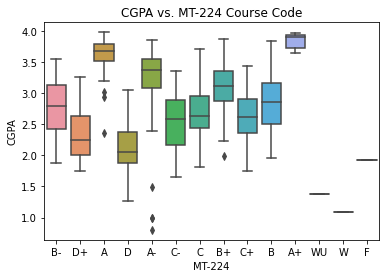

In [133]:
# lets analyze the relation between CGPA and MT-224 by box plot

sns.boxplot(x='MT-224', y='CGPA', data=df)
plt.title('CGPA vs. MT-224 Course Code')
plt.xlabel('MT-224')
plt.ylabel('CGPA')
plt.show()

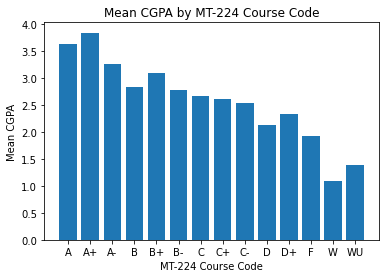

In [134]:
# lets analyze the relation between CGPA and MT-224 by barplot

# Calculate mean CGPA for each value of MT-224
means = df.groupby('MT-224')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by MT-224 Course Code')
plt.xlabel('MT-224 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

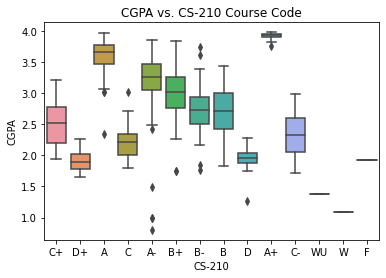

In [135]:
# lets analyze the relation between CGPA and CS-210 by box plot

sns.boxplot(x='CS-210', y='CGPA', data=df)
plt.title('CGPA vs. CS-210 Course Code')
plt.xlabel('CS-210')
plt.ylabel('CGPA')
plt.show()

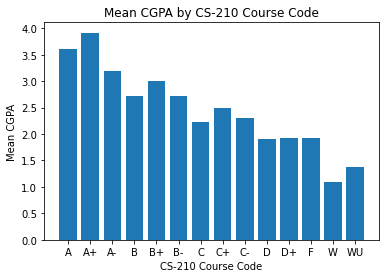

In [136]:
# lets analyze the relation between CGPA and CS-210 by barplot

# Calculate mean CGPA for each value of CS-210
means = df.groupby('CS-210')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-210 Course Code')
plt.xlabel('CS-210 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

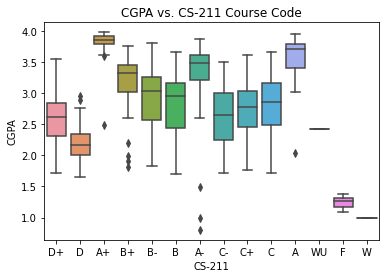

In [137]:
# lets analyze the relation between CGPA and CS-211 by box plot

sns.boxplot(x='CS-211', y='CGPA', data=df)
plt.title('CGPA vs. CS-211 Course Code')
plt.xlabel('CS-211')
plt.ylabel('CGPA')
plt.show()

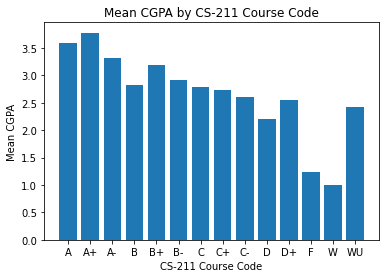

In [138]:
# lets analyze the relation between CGPA and CS-211 by barplot

# Calculate mean CGPA for each value of CS-211
means = df.groupby('CS-211')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-211 Course Code')
plt.xlabel('CS-211 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

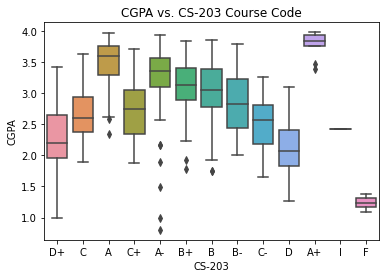

In [139]:
# lets analyze the relation between CGPA and CS-203 by box plot

sns.boxplot(x='CS-203', y='CGPA', data=df)
plt.title('CGPA vs. CS-203 Course Code')
plt.xlabel('CS-203')
plt.ylabel('CGPA')
plt.show()

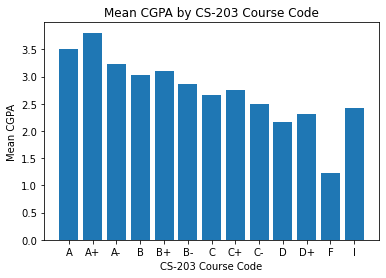

In [140]:
# lets analyze the relation between CGPA and CS-203 by barplot

# Calculate mean CGPA for each value of CS-203
means = df.groupby('CS-203')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-203 Course Code')
plt.xlabel('CS-203 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

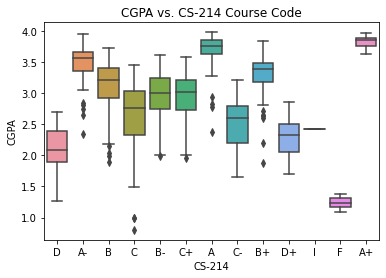

In [141]:
# lets analyze the relation between CGPA and CS-214 by box plot

sns.boxplot(x='CS-214', y='CGPA', data=df)
plt.title('CGPA vs. CS-214 Course Code')
plt.xlabel('CS-214')
plt.ylabel('CGPA')
plt.show()

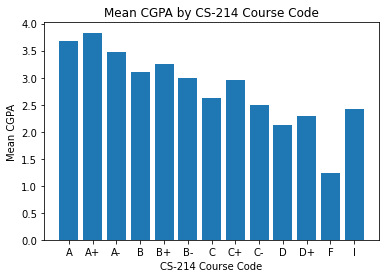

In [142]:
# lets analyze the relation between CGPA and CS-214 by barplot

# Calculate mean CGPA for each value of CS-214
means = df.groupby('CS-214')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-214 Course Code')
plt.xlabel('CS-214 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

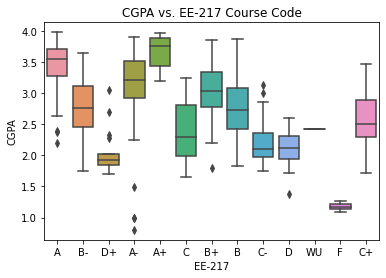

In [143]:
# lets analyze the relation between CGPA and EE-217 by box plot

sns.boxplot(x='EE-217', y='CGPA', data=df)
plt.title('CGPA vs. EE-217 Course Code')
plt.xlabel('EE-217')
plt.ylabel('CGPA')
plt.show()

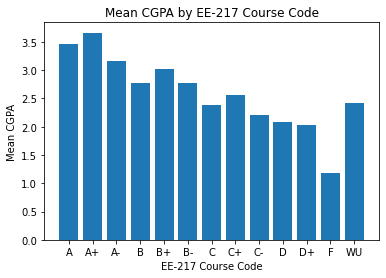

In [144]:
# lets analyze the relation between CGPA and EE-217 by barplot

# Calculate mean CGPA for each value of EE-217
means = df.groupby('EE-217')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by EE-217 Course Code')
plt.xlabel('EE-217 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

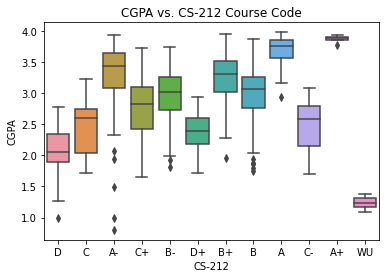

In [145]:
# lets analyze the relation between CGPA and CS-212 by box plot

sns.boxplot(x='CS-212', y='CGPA', data=df)
plt.title('CGPA vs. CS-212 Course Code')
plt.xlabel('CS-212')
plt.ylabel('CGPA')
plt.show()

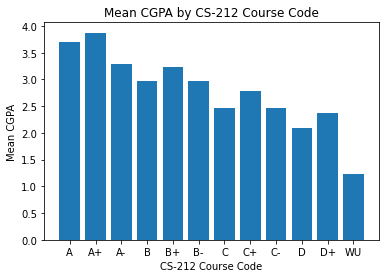

In [146]:
# lets analyze the relation between CGPA and CS-212 by barplot

# Calculate mean CGPA for each value of CS-212
means = df.groupby('CS-212')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-212 Course Code')
plt.xlabel('CS-212 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

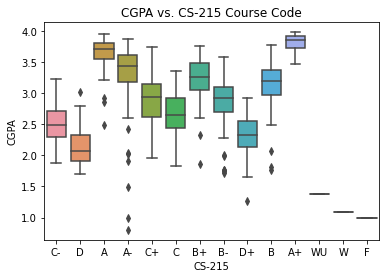

In [147]:
# lets analyze the relation between CGPA and CS-215 by box plot

sns.boxplot(x='CS-215', y='CGPA', data=df)
plt.title('CGPA vs. CS-215 Course Code')
plt.xlabel('CS-215')
plt.ylabel('CGPA')
plt.show()

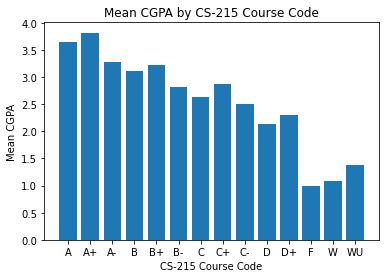

In [148]:
# lets analyze the relation between CGPA and CS-215 by barplot

# Calculate mean CGPA for each value of CS-215
means = df.groupby('CS-215')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-215 Course Code')
plt.xlabel('CS-215 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

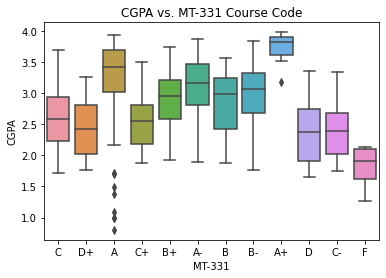

In [149]:
# lets analyze the relation between CGPA and MT-331 by box plot

sns.boxplot(x='MT-331', y='CGPA', data=df)
plt.title('CGPA vs. MT-331 Course Code')
plt.xlabel('MT-331')
plt.ylabel('CGPA')
plt.show()

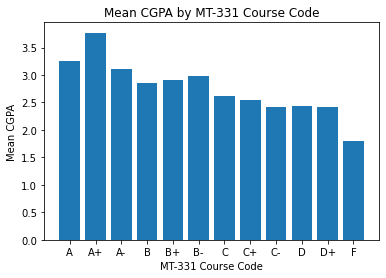

In [150]:
# lets analyze the relation between CGPA and MT-331 by barplot

# Calculate mean CGPA for each value of MT-331
means = df.groupby('MT-331')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by MT-331 Course Code')
plt.xlabel('MT-331 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

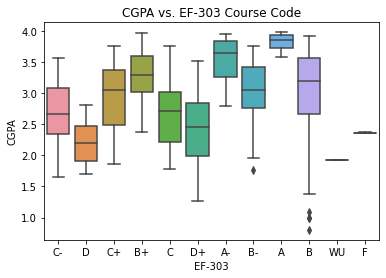

In [151]:
# lets analyze the relation between CGPA and EF-303 by box plot

sns.boxplot(x='EF-303', y='CGPA', data=df)
plt.title('CGPA vs. EF-303 Course Code')
plt.xlabel('EF-303')
plt.ylabel('CGPA')
plt.show()

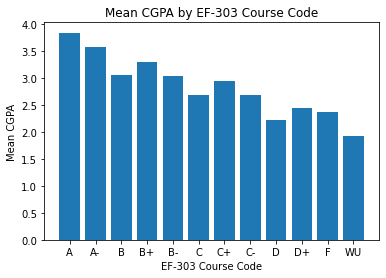

In [152]:
# lets analyze the relation between CGPA and EF-303 by barplot

# Calculate mean CGPA for each value of EF-303
means = df.groupby('EF-303')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by EF-303 Course Code')
plt.xlabel('EF-303 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

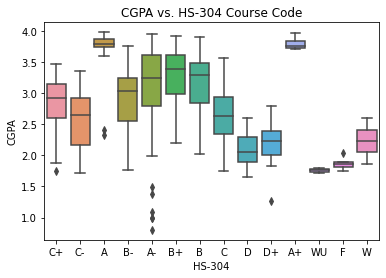

In [153]:
# lets analyze the relation between CGPA and HS-304 by box plot

sns.boxplot(x='HS-304', y='CGPA', data=df)
plt.title('CGPA vs. HS-304 Course Code')
plt.xlabel('HS-304')
plt.ylabel('CGPA')
plt.show()

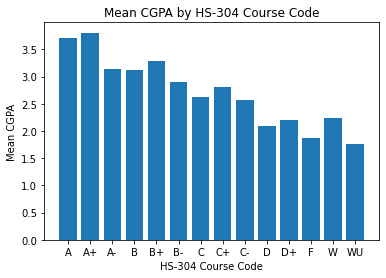

In [154]:
# lets analyze the relation between CGPA and HS-304 by barplot

# Calculate mean CGPA for each value of HS-304
means = df.groupby('HS-304')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by HS-304 Course Code')
plt.xlabel('HS-304 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

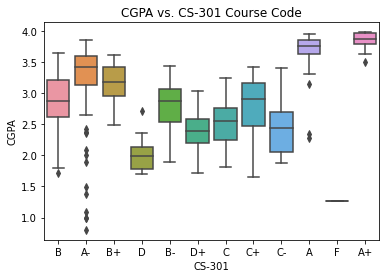

In [155]:
# lets analyze the relation between CGPA and CS-301 by box plot

sns.boxplot(x='CS-301', y='CGPA', data=df)
plt.title('CGPA vs. CS-301 Course Code')
plt.xlabel('CS-301')
plt.ylabel('CGPA')
plt.show()

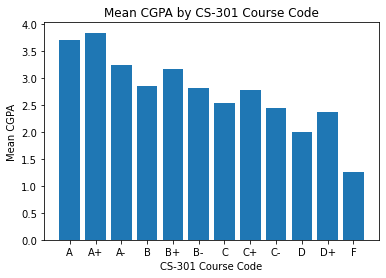

In [156]:
# lets analyze the relation between CGPA and CS-301 by barplot

# Calculate mean CGPA for each value of CS-301
means = df.groupby('CS-301')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-301 Course Code')
plt.xlabel('CS-301 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

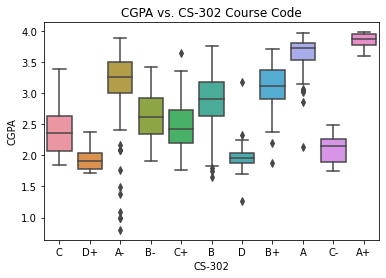

In [157]:
# lets analyze the relation between CGPA and CS-302 by box plot

sns.boxplot(x='CS-302', y='CGPA', data=df)
plt.title('CGPA vs. CS-302 Course Code')
plt.xlabel('CS-302')
plt.ylabel('CGPA')
plt.show()

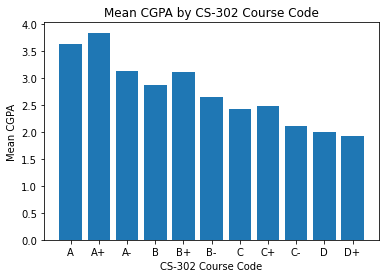

In [158]:
# lets analyze the relation between CGPA and CS-302 by barplot

# Calculate mean CGPA for each value of CS-302
means = df.groupby('CS-302')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-302 Course Code')
plt.xlabel('CS-302 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

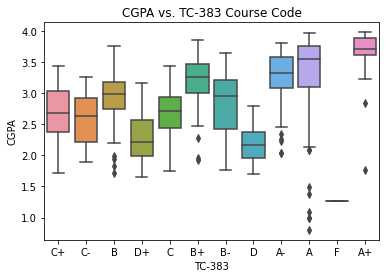

In [159]:
# lets analyze the relation between CGPA and TC-383 by box plot

sns.boxplot(x='TC-383', y='CGPA', data=df)
plt.title('CGPA vs. TC-383 Course Code')
plt.xlabel('TC-383')
plt.ylabel('CGPA')
plt.show()

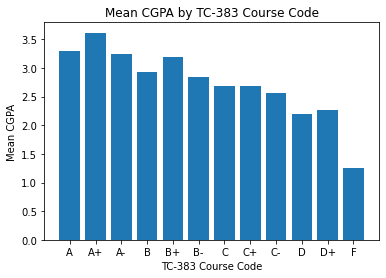

In [160]:
# lets analyze the relation between CGPA and TC-383 by barplot

# Calculate mean CGPA for each value of TC-383
means = df.groupby('TC-383')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by TC-383 Course Code')
plt.xlabel('TC-383 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

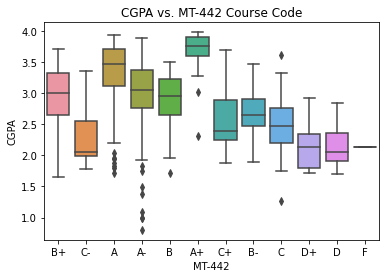

In [161]:
# lets analyze the relation between CGPA and MT-442 by box plot

sns.boxplot(x='MT-442', y='CGPA', data=df)
plt.title('CGPA vs. MT-442 Course Code')
plt.xlabel('MT-442')
plt.ylabel('CGPA')
plt.show()

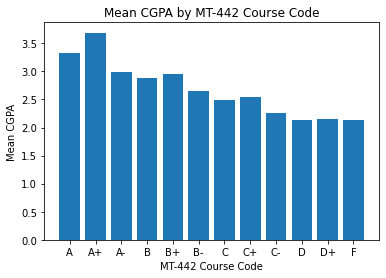

In [162]:
# lets analyze the relation between CGPA and MT-442 by barplot

# Calculate mean CGPA for each value of MT-442
means = df.groupby('MT-442')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by MT-442 Course Code')
plt.xlabel('MT-442 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

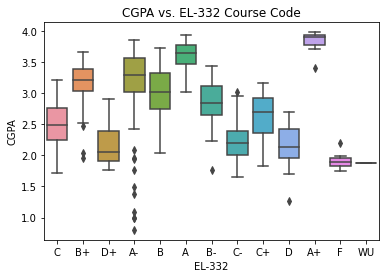

In [163]:
# lets analyze the relation between CGPA and EL-332 by box plot

sns.boxplot(x='EL-332', y='CGPA', data=df)
plt.title('CGPA vs. EL-332 Course Code')
plt.xlabel('EL-332')
plt.ylabel('CGPA')
plt.show()

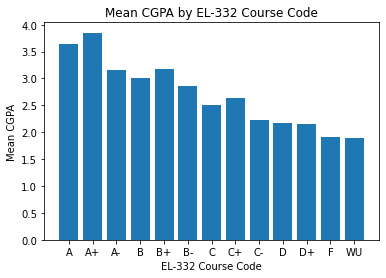

In [164]:
# lets analyze the relation between CGPA and EL-332 by barplot

# Calculate mean CGPA for each value of EL-332
means = df.groupby('EL-332')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by EL-332 Course Code')
plt.xlabel('EL-332 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

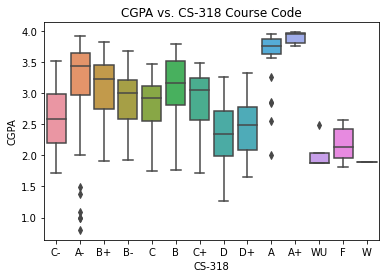

In [165]:
# lets analyze the relation between CGPA and CS-318 by box plot

sns.boxplot(x='CS-318', y='CGPA', data=df)
plt.title('CGPA vs. CS-318 Course Code')
plt.xlabel('CS-318')
plt.ylabel('CGPA')
plt.show()

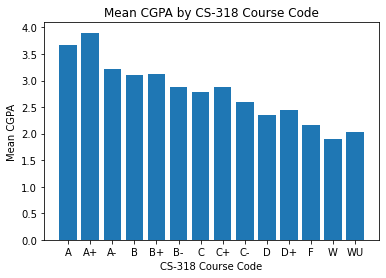

In [166]:
# lets analyze the relation between CGPA and CS-318 by barplot

# Calculate mean CGPA for each value of CS-318
means = df.groupby('CS-318')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-318 Course Code')
plt.xlabel('CS-318 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

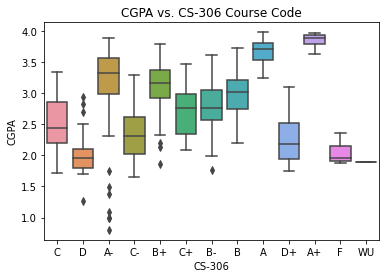

In [167]:
# lets analyze the relation between CGPA and CS-306 by box plot

sns.boxplot(x='CS-306', y='CGPA', data=df)
plt.title('CGPA vs. CS-306 Course Code')
plt.xlabel('CS-306')
plt.ylabel('CGPA')
plt.show()

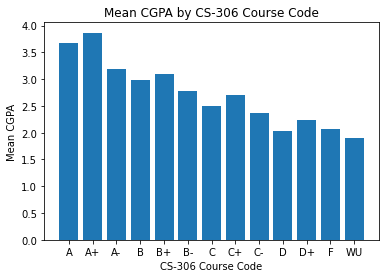

In [168]:
# lets analyze the relation between CGPA and CS-306 by barplot

# Calculate mean CGPA for each value of CS-306
means = df.groupby('CS-306')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-306 Course Code')
plt.xlabel('CS-306 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

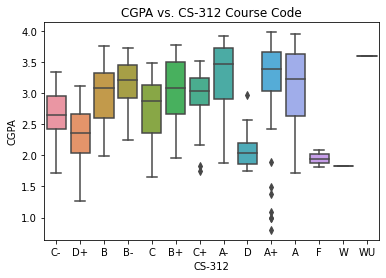

In [169]:
# lets analyze the relation between CGPA and CS-312 by box plot

sns.boxplot(x='CS-312', y='CGPA', data=df)
plt.title('CGPA vs. CS-312 Course Code')
plt.xlabel('CS-312')
plt.ylabel('CGPA')
plt.show()

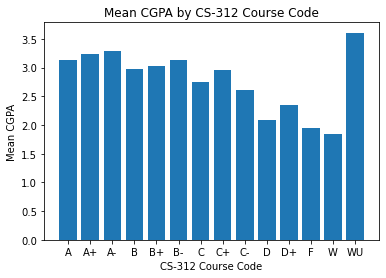

In [170]:
# lets analyze the relation between CGPA and CS-312 by barplot

# Calculate mean CGPA for each value of CS-312
means = df.groupby('CS-312')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-312 Course Code')
plt.xlabel('CS-312 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

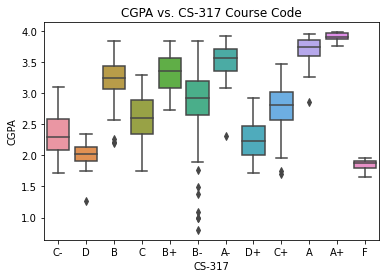

In [171]:
# lets analyze the relation between CGPA and CS-317 by box plot

sns.boxplot(x='CS-317', y='CGPA', data=df)
plt.title('CGPA vs. CS-317 Course Code')
plt.xlabel('CS-317')
plt.ylabel('CGPA')
plt.show()

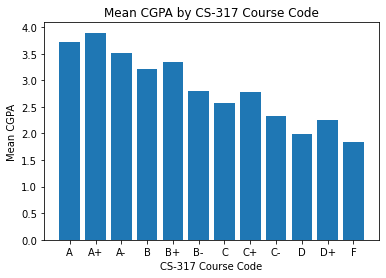

In [172]:
# lets analyze the relation between CGPA and CS-317 by barplot

# Calculate mean CGPA for each value of CS-317
means = df.groupby('CS-317')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-317 Course Code')
plt.xlabel('CS-317 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

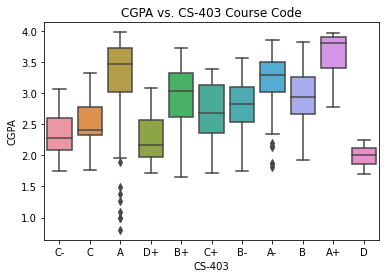

In [173]:
# lets analyze the relation between CGPA and CS-403 by box plot

sns.boxplot(x='CS-403', y='CGPA', data=df)
plt.title('CGPA vs. CS-403 Course Code')
plt.xlabel('CS-403')
plt.ylabel('CGPA')
plt.show()

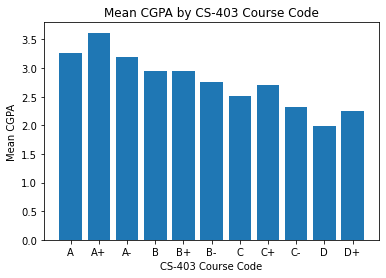

In [174]:
# lets analyze the relation between CGPA and CS-403 by barplot

# Calculate mean CGPA for each value of CS-403
means = df.groupby('CS-403')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-403 Course Code')
plt.xlabel('CS-403 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

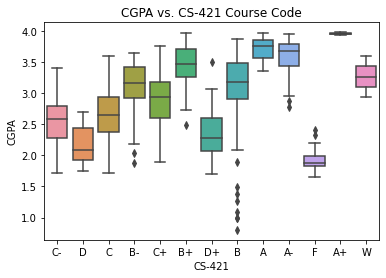

In [175]:
# lets analyze the relation between CGPA and CS-421 by box plot

sns.boxplot(x='CS-421', y='CGPA', data=df)
plt.title('CGPA vs. CS-421 Course Code')
plt.xlabel('CS-421')
plt.ylabel('CGPA')
plt.show()

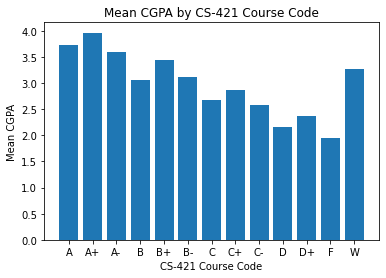

In [176]:
# lets analyze the relation between CGPA and CS-421 by barplot

# Calculate mean CGPA for each value of CS-421
means = df.groupby('CS-421')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-421 Course Code')
plt.xlabel('CS-421 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

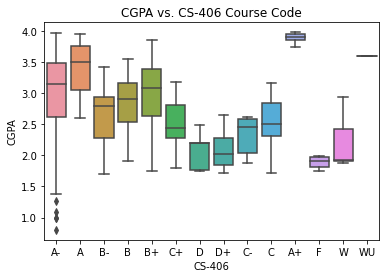

In [177]:
# lets analyze the relation between CGPA and CS-406 by box plot

sns.boxplot(x='CS-406', y='CGPA', data=df)
plt.title('CGPA vs. CS-406 Course Code')
plt.xlabel('CS-406')
plt.ylabel('CGPA')
plt.show()

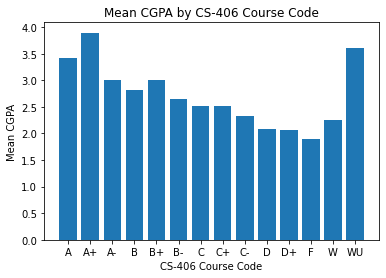

In [178]:
# lets analyze the relation between CGPA and CS-406 by barplot

# Calculate mean CGPA for each value of CS-406
means = df.groupby('CS-406')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-406 Course Code')
plt.xlabel('CS-406 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

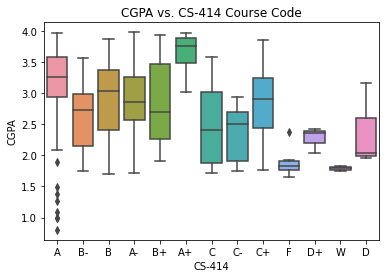

In [179]:
# lets analyze the relation between CGPA and CS-414 by box plot

sns.boxplot(x='CS-414', y='CGPA', data=df)
plt.title('CGPA vs. CS-414 Course Code')
plt.xlabel('CS-414')
plt.ylabel('CGPA')
plt.show()

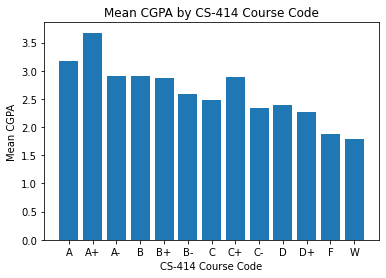

In [180]:
# lets analyze the relation between CGPA and CS-414 by barplot

# Calculate mean CGPA for each value of CS-414
means = df.groupby('CS-414')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-414 Course Code')
plt.xlabel('CS-414 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

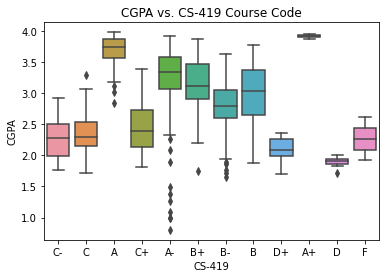

In [181]:
# lets analyze the relation between CGPA and CS-419 by box plot

sns.boxplot(x='CS-419', y='CGPA', data=df)
plt.title('CGPA vs. CS-419 Course Code')
plt.xlabel('CS-419')
plt.ylabel('CGPA')
plt.show()

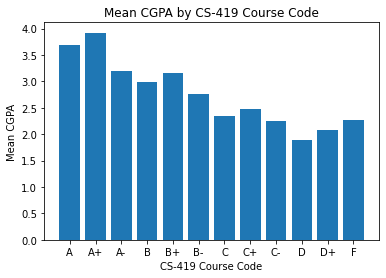

In [182]:
# lets analyze the relation between CGPA and CS-419 by barplot

# Calculate mean CGPA for each value of CS-419
means = df.groupby('CS-419')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-419 Course Code')
plt.xlabel('CS-419 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

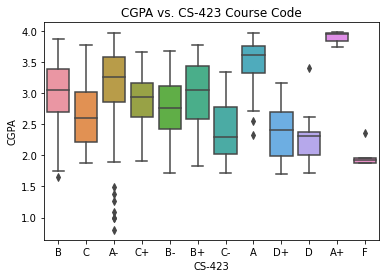

In [183]:
# lets analyze the relation between CGPA and CS-423 by box plot

sns.boxplot(x='CS-423', y='CGPA', data=df)
plt.title('CGPA vs. CS-423 Course Code')
plt.xlabel('CS-423')
plt.ylabel('CGPA')
plt.show()

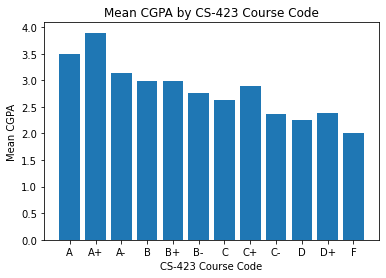

In [184]:
# lets analyze the relation between CGPA and CS-423 by barplot

# Calculate mean CGPA for each value of CS-423
means = df.groupby('CS-423')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-423 Course Code')
plt.xlabel('CS-423 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

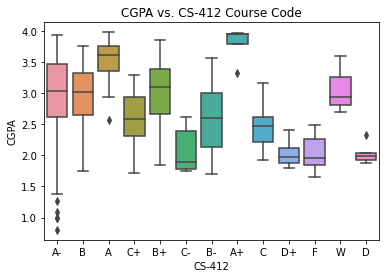

In [185]:
# lets analyze the relation between CGPA and CS-412 by box plot

sns.boxplot(x='CS-412', y='CGPA', data=df)
plt.title('CGPA vs. CS-412 Course Code')
plt.xlabel('CS-412')
plt.ylabel('CGPA')
plt.show()

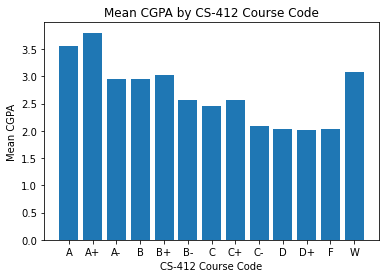

In [186]:
# lets analyze the relation between CGPA and CS-412 by barplot

# Calculate mean CGPA for each value of CS-412
means = df.groupby('CS-412')['CGPA'].mean()

# Create bar plot
plt.bar(x=means.index, height=means.values)
plt.title('Mean CGPA by CS-412 Course Code')
plt.xlabel('CS-412 Course Code')
plt.ylabel('Mean CGPA')
plt.show()

In bivariate analysis, we perform two plots, 1.boxplot, 2. bar plot. 

In box plot we can see the distribution of CGPA scores for each course code,and identification of any potential outliers.

The bar plot with mean values will give an idea of the average performance of students in a particular course (represented by the course code) in terms of their CGPA. 

Here, In bar plot we can see the distribution of the mean CGPA for each unique value of the each course code. It helps in visualizing how the mean CGPA varies across the different values of that particular course code. This information can be useful in identifying any patterns or trends in the data and for further analysis.


# Encoding Categorical columns

In [187]:
df.shape

(571, 42)

In [188]:
from sklearn.preprocessing import LabelEncoder

# select all columns except CGPA
cols_to_encode = [col for col in df.columns if col != "CGPA"]

# label encode the selected columns
for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# print the encoded labels
print(df)

          PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
Seat No.                                                                      
CS-97001       5      10       8          6       8      10       9       8   
CS-97002       0       9      10          9       5       6       9       0   
CS-97003       0       3       0          5       4       0       5       4   
CS-97004       9       7      10          9       9       2      10       8   
CS-97005       2       2       2          4       0       0       2       4   
CS-97006       0       5       3         10       7       2       7       3   
CS-97007       5       8       2          9       2       3       0       4   
CS-97008       4       4       7          6       6       2       8       2   
CS-97009       2       6       2         10       3       2       2       2   
CS-97010       0       3       7          3       3       2       6       5   
CS-97011       2       5       4          8       8 

In [189]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [190]:
df.dtypes

PH-121         int64
HS-101         int64
CY-105         int64
HS-105/12      int64
MT-111         int64
CS-105         int64
CS-106         int64
EL-102         int64
EE-119         int64
ME-107         int64
CS-107         int64
HS-205/20      int64
MT-222         int64
EE-222         int64
MT-224         int64
CS-210         int64
CS-211         int64
CS-203         int64
CS-214         int64
EE-217         int64
CS-212         int64
CS-215         int64
MT-331         int64
EF-303         int64
HS-304         int64
CS-301         int64
CS-302         int64
TC-383         int64
MT-442         int64
EL-332         int64
CS-318         int64
CS-306         int64
CS-312         int64
CS-317         int64
CS-403         int64
CS-421         int64
CS-406         int64
CS-414         int64
CS-419         int64
CS-423         int64
CS-412         int64
CGPA         float64
dtype: object

# Checking outliers

In [191]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

Checking outliers for numerical column by box plot

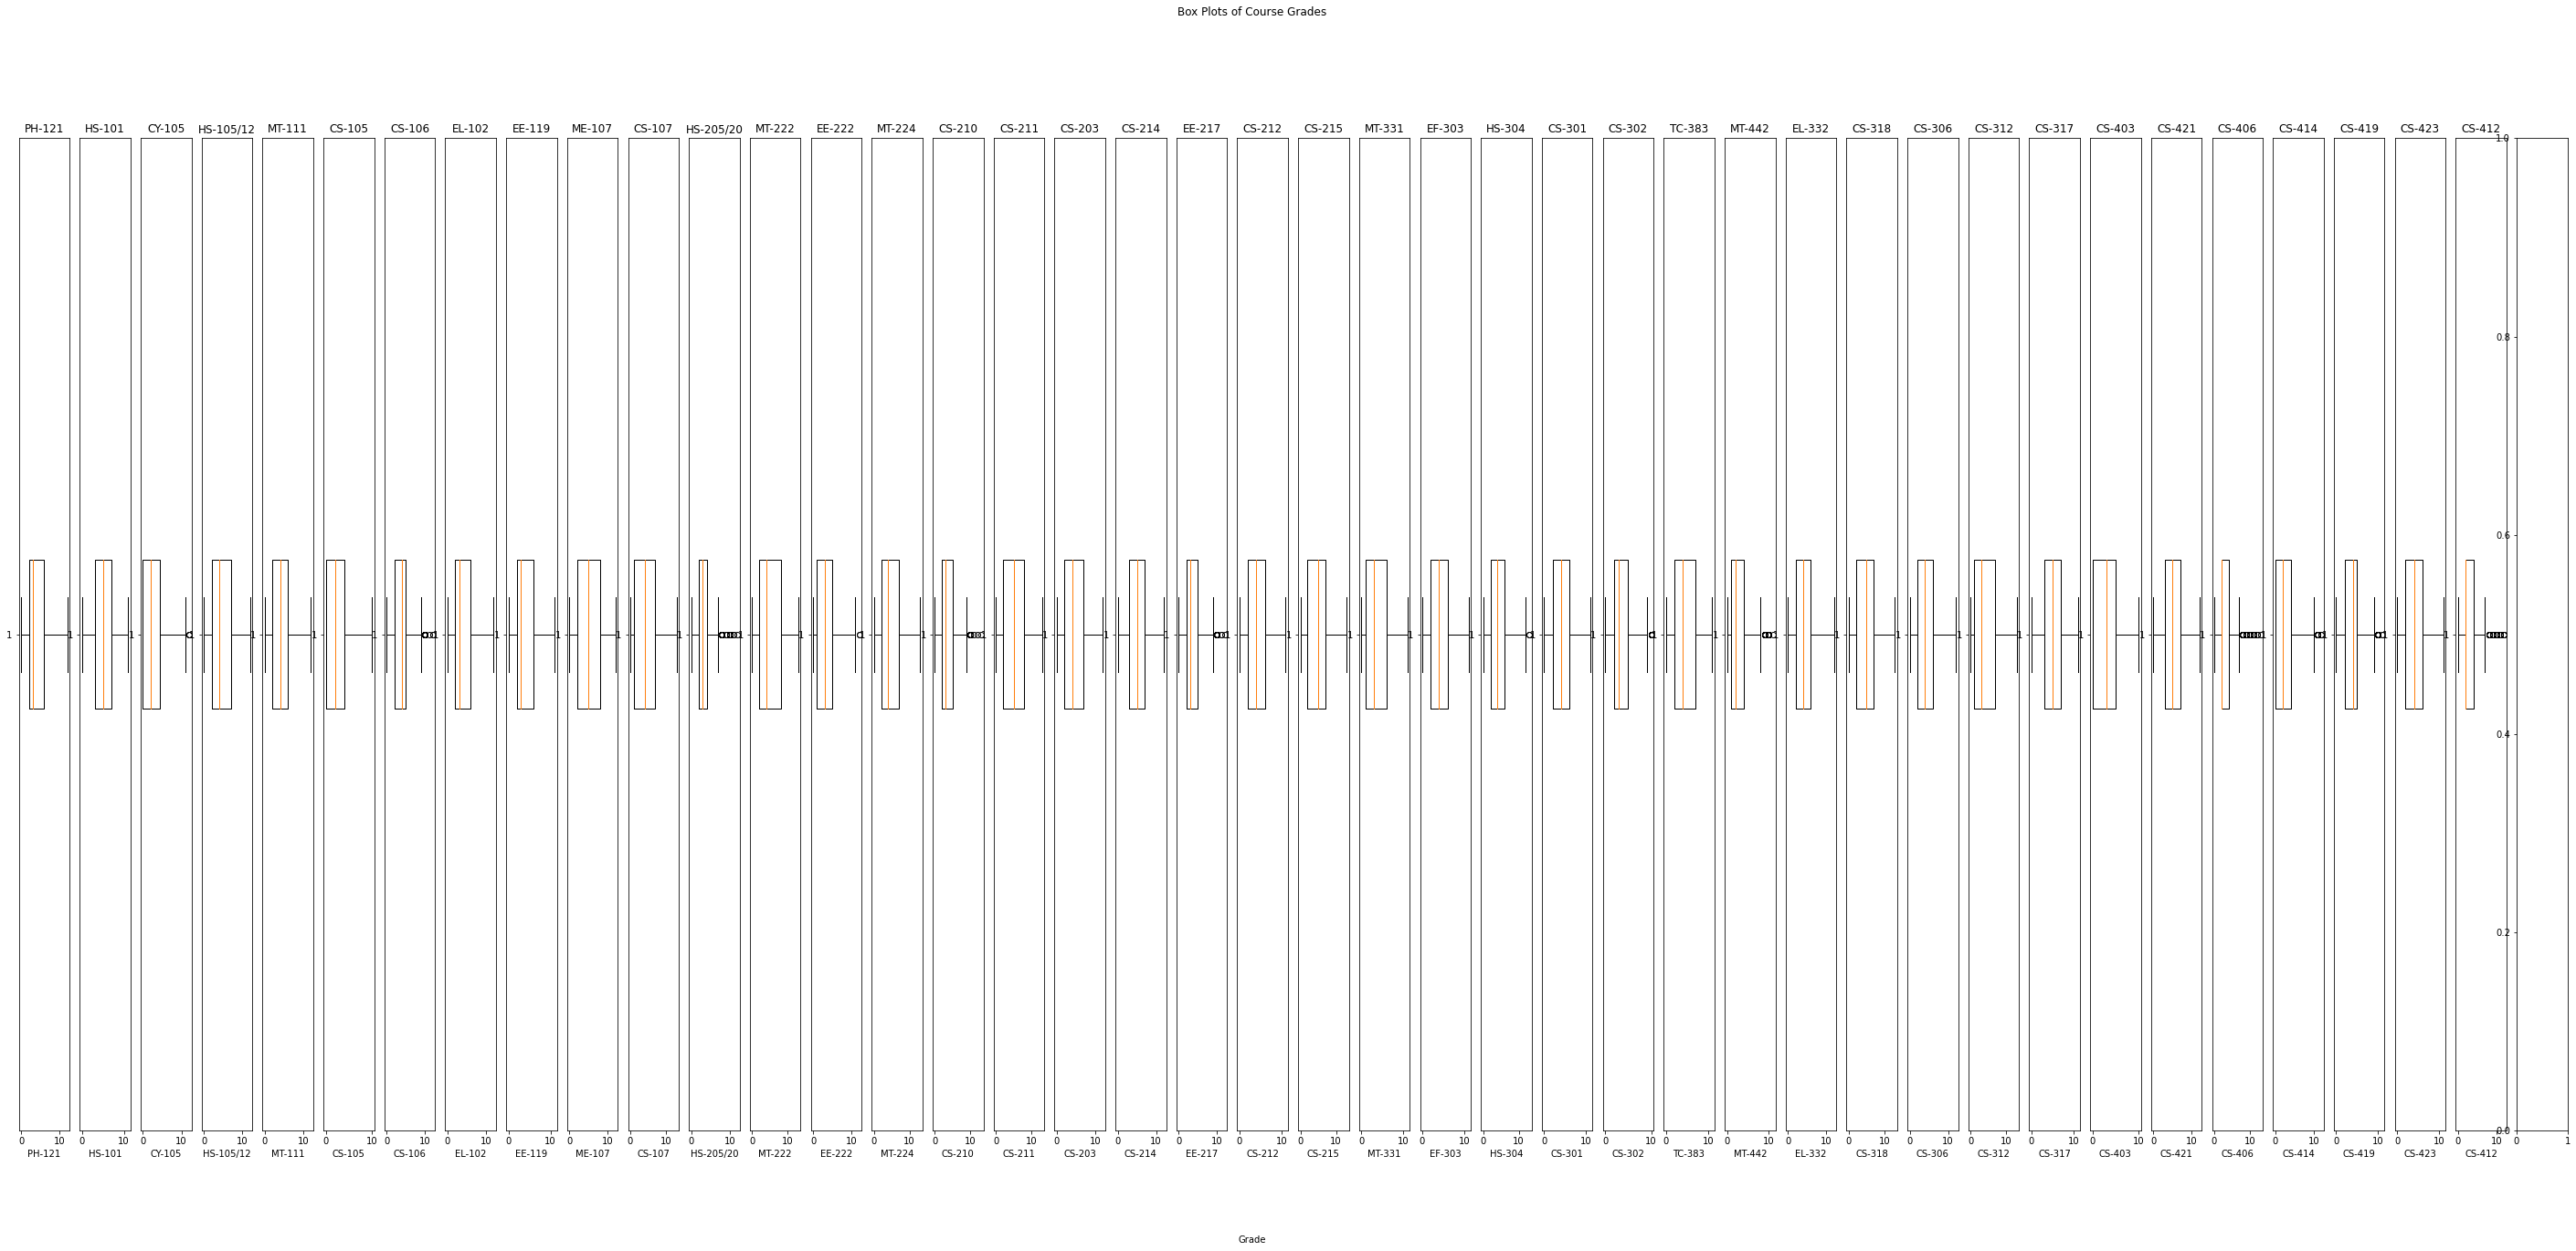

In [192]:
import matplotlib.pyplot as plt

# create a figure and axis object with subplots
fig, ax = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(50, 20))

# create a list of columns to plot
columns = df.columns[:-1]

for i, col in enumerate(columns):
    ax[i].boxplot(df[col], vert=False)
    ax[i].set_title(col)
    ax[i].set_xlabel(col)
    
# set the title and x-axis labels
fig.suptitle('Box Plots of Course Grades')
fig.text(0.5, 0.04, 'Grade', ha='center')
plt.show()

We can see few outliers present in the many columns.

Lets handle them now

In [193]:
# define a function to handle outliers
def handle_outliers(data):
    # calculate the first and third quartiles
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    # calculate the interquartile range
    iqr = q3 - q1
    
    # calculate the lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # replace outliers with the lower or upper bound value
    data[data < lower_bound] = lower_bound
    data[data > upper_bound] = upper_bound
    
    return data

# apply the handle_outliers function to each column of the encoded data
df = df.apply(handle_outliers, axis=0)

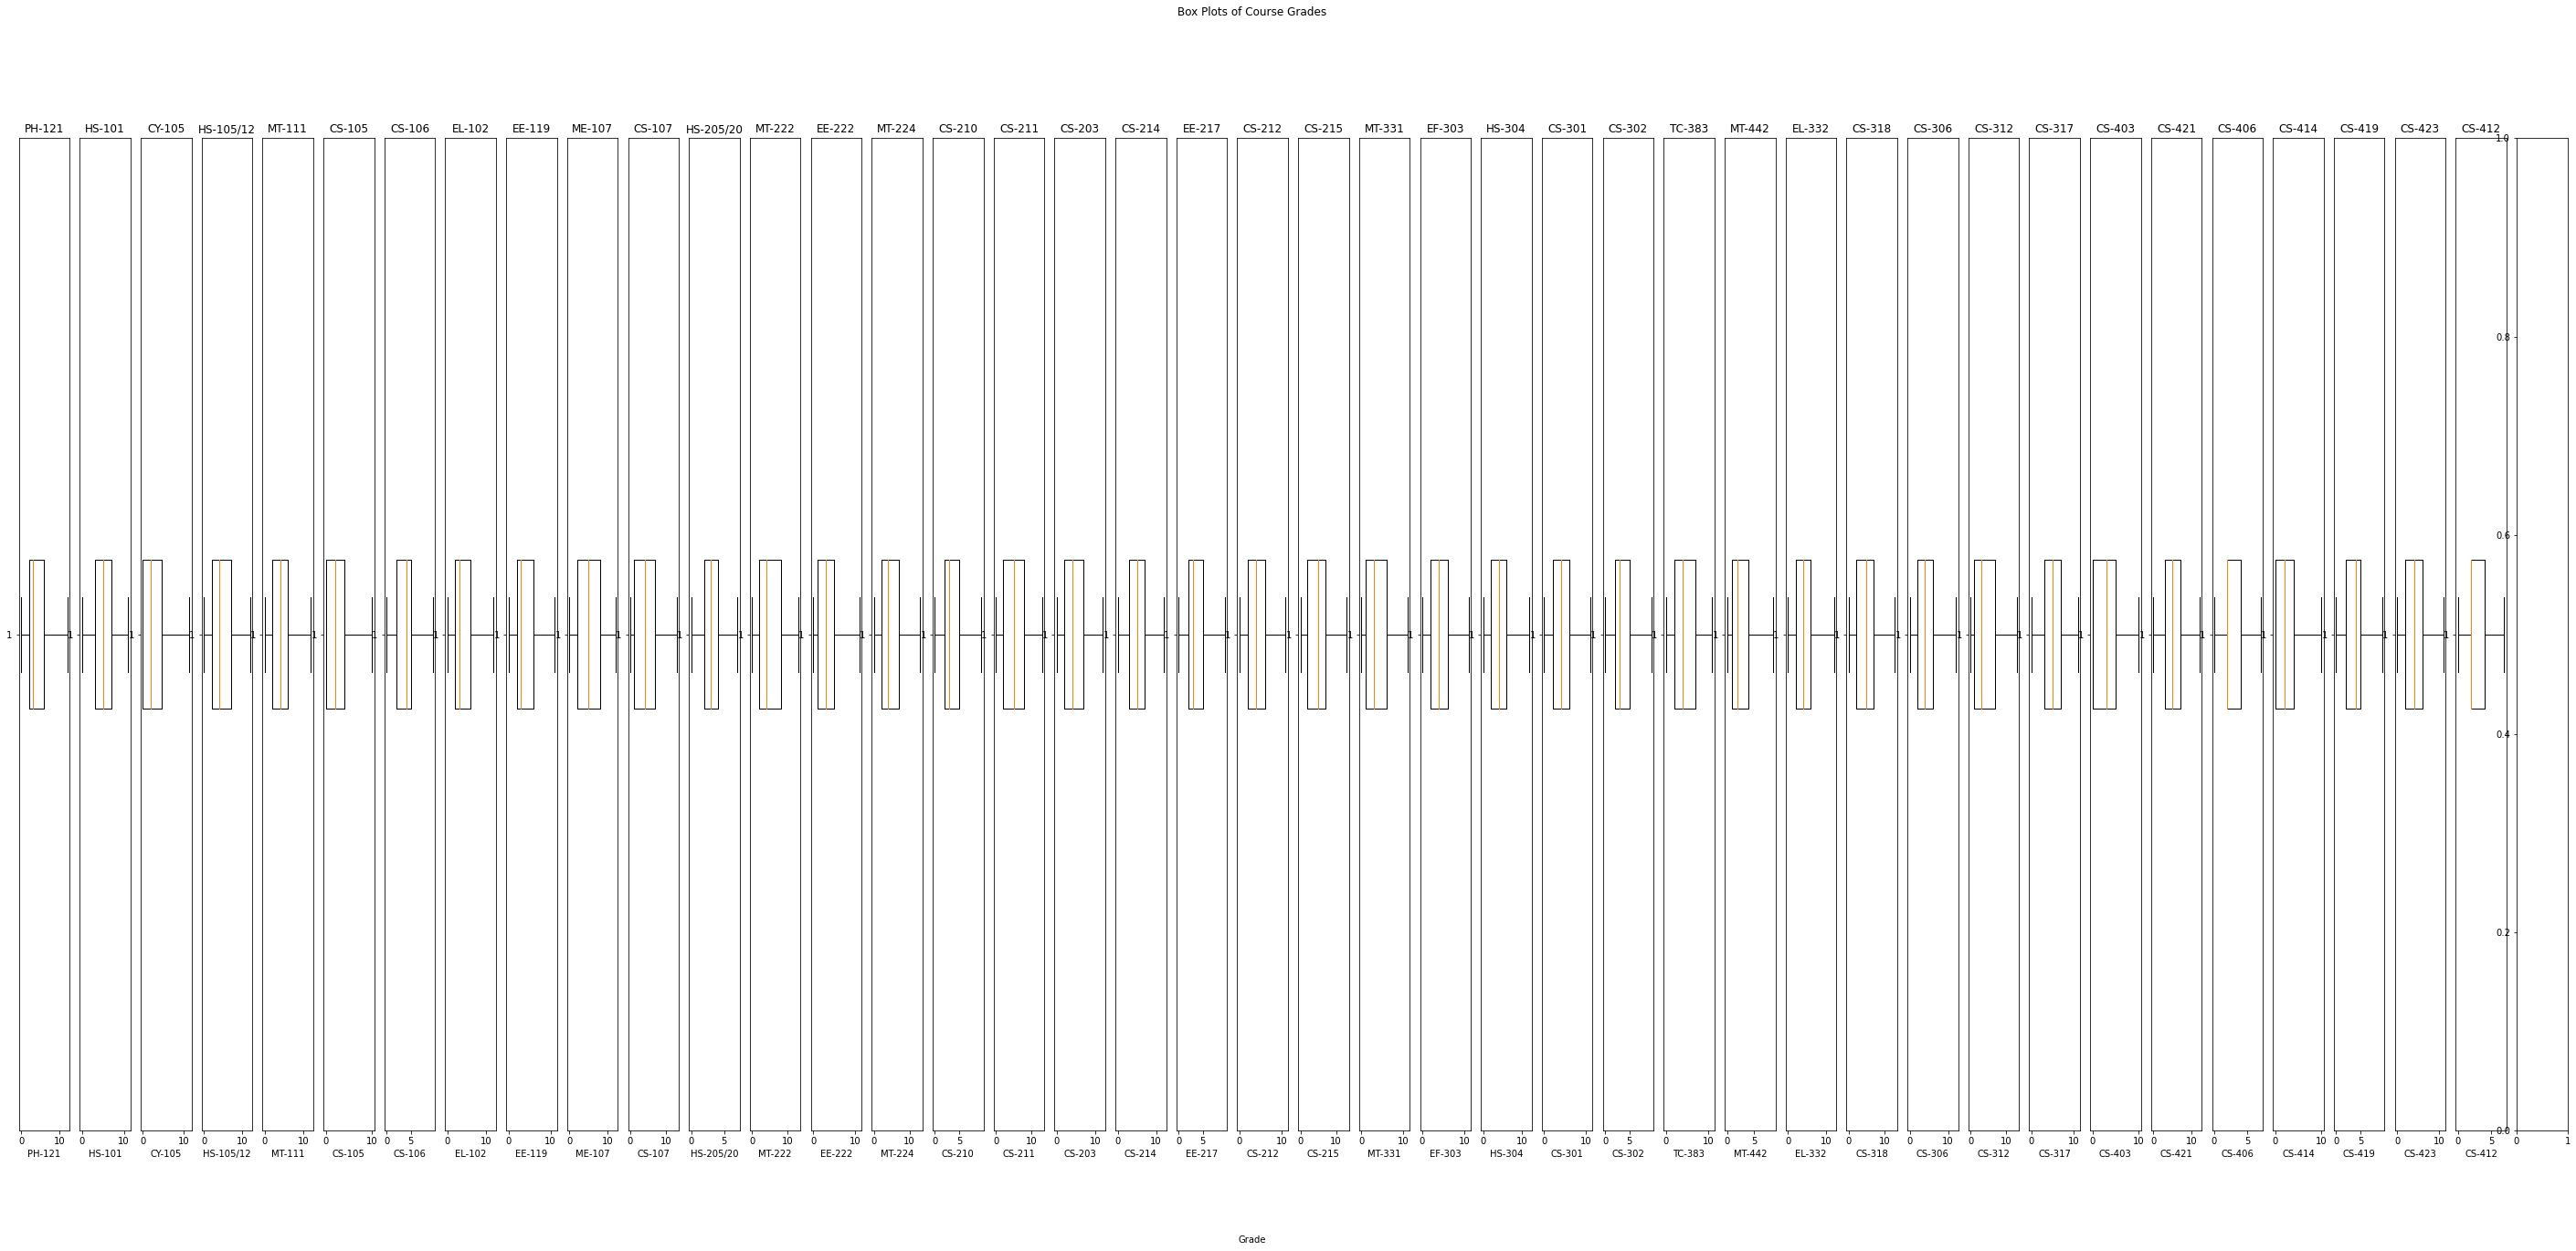

In [194]:
# create a figure and axis object with subplots
fig, ax = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(50, 20))

# create a list of columns to plot
columns = df.columns[:-1]

for i, col in enumerate(columns):
    ax[i].boxplot(df[col], vert=False)
    ax[i].set_title(col)
    ax[i].set_xlabel(col)
    
# set the title and x-axis labels
fig.suptitle('Box Plots of Course Grades')
fig.text(0.5, 0.04, 'Grade', ha='center')
plt.show()

Outliers are handled carefully.

In [195]:
df.shape

(571, 42)

# Checking Skweness

In [196]:
# Lets check the skew of numeric column

df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.962662
HS-105/12    0.324183
MT-111       0.484906
CS-105       0.930769
CS-106       0.531919
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.404311
MT-222       0.193993
EE-222       0.743644
MT-224       0.430480
CS-210       0.594897
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.620903
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.519084
CS-301       0.415084
CS-302       0.561758
TC-383       0.331652
MT-442       0.725627
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-406       0.768516
CS-414       1.145634
CS-419       0.412544
CS-423       0.526550
CS-412       0.593026
CGPA        -0.449356
dtype: float64

In [197]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# create a list of columns to transform
columns = ['PH-121', 'CY-105', 'CS-105', 'EE-119', 'MT-331', 'CS-403', 'CS-406', 'CS-414']

# apply BoxCox transformation to each column
for col in columns:
    data = df[col]
    # transform the data using BoxCox method
    data_transformed, lambda_val = boxcox(data+1)
    # replace the column with the transformed data
    df[col] = data_transformed

In [198]:
df.skew()

PH-121      -0.103905
HS-101       0.053303
CY-105      -0.014382
HS-105/12    0.324183
MT-111       0.484906
CS-105      -0.036751
CS-106       0.531919
EL-102       0.501161
EE-119      -0.063288
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.404311
MT-222       0.193993
EE-222       0.743644
MT-224       0.430480
CS-210       0.594897
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.620903
CS-212       0.414872
CS-215       0.163631
MT-331      -0.089948
EF-303       0.383655
HS-304       0.519084
CS-301       0.415084
CS-302       0.561758
TC-383       0.331652
MT-442       0.725627
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403      -0.099369
CS-421       0.179508
CS-406      -0.023434
CS-414      -0.011231
CS-419       0.412544
CS-423       0.526550
CS-412       0.593026
CGPA        -0.449356
dtype: float64

In [199]:
df.shape

(571, 42)

In [200]:
df

PH-121  HS-101    CY-105  HS-105/12  MT-111    CS-105  CS-106  \
Seat No.                                                                    
CS-97001  2.552633      10  2.299341          6       8  2.805481     9.0   
CS-97002  0.000000       9  2.519855          9       5  2.208971     9.0   
CS-97003  0.000000       3  0.000000          5       4  0.000000     5.0   
CS-97004  3.653288       7  2.519855          9       9  1.179396     9.5   
CS-97005  1.358861       2  1.123756          4       0  0.000000     2.0   
CS-97006  0.000000       5  1.426490         10       7  1.179396     7.0   
CS-97007  2.552633       8  1.123756          9       2  1.516553     0.0   
CS-97008  2.208036       4  2.170754          6       6  1.179396     8.0   
CS-97009  1.358861       6  1.123756         10       3  1.179396     2.0   
CS-97010  0.000000       3  2.170754          3       3  1.179396     6.0   
CS-97011  1.358861       5  1.663783          8       8  2.013276     7.0   
CS-97012  1.358861       6  1.123756          7       8  0.000000     5.0   
CS-97013  1.817058       6  1.123756          6       5  1.516553     9.5   
CS-97014  0.000000       8  1.123756          8       3  1.179396     7.0   
CS-97015  0.000000       6  1.123756          7       2  0.000000     5.0   
CS-97016  1.358861       8  1.859284          9       5  1.786735     5.0   
CS-97017  1.358861       8  0.000000         10       2  0.000000     3.0   
CS-97018  2.552633       8  2.025724          9       9  2.381632     9.5   
CS-97019  0.000000       8  0.000000          7       2  0.000000     2.0   
CS-97020  2.208036       6  1.123756          8       2  1.786735     2.0   
CS-97021  2.208036       6  1.426490         10       5  2.536392     8.0   
CS-97022  1.817058       4  1.859284          6       2  1.179396     9.5   
CS-97023  2.208036       7  1.859284          7       8  1.179396     5.0   
CS-97024  0.000000       2  0.000000          2       0  0.000000     5.0   
CS-97025  0.000000       5  1.123756          3       4  1.179396     3.0   
CS-97026  3.146524       8  2.025724          8       9  2.013276     9.0   
CS-97027  0.000000       4  0.000000          2       2  0.000000     7.0   
CS-97028  2.862903       7  2.519855         10       8  1.786735     9.0   
CS-97029  2.208036       3  1.123756          4       5  0.000000     3.0   
CS-97030  2.862903       5  2.025724         10       3  1.516553     7.0   
CS-97031  1.358861       3  0.000000          4       5  1.179396     4.0   
CS-97032  0.000000       7  1.123756          7       4  1.179396     5.0   
CS-97033  1.817058       7  0.000000         10       2  0.000000     2.0   
CS-97034  0.000000       7  1.123756          3       2  1.786735     8.0   
CS-97035  2.208036       5  1.123756          0       7  1.179396     9.0   
CS-97036  1.817058       7  1.859284         10       4  1.179396     5.0   
CS-97037  2.208036       4  1.123756          5       4  1.179396     7.0   
CS-97038  1.817058       6  1.123756          5       4  0.000000     0.0   
CS-97039  3.408735       8  2.414894          9       7  2.381632     8.0   
CS-97040  1.358861       2  1.663783          4       2  0.724744     4.0   
CS-97041  1.358861       5  1.859284          6       2  0.000000     0.0   
CS-97042  1.817058       6  2.170754          6      10  1.179396     9.5   
CS-97043  2.208036       6  1.426490          6       5  1.179396     9.0   
CS-97044  3.408735       4  2.025724          4       7  1.179396     4.0   
CS-97045  3.653288       6  0.000000          0       2  2.536392     2.0   
CS-97046  1.817058       5  1.859284         10       8  2.208971     9.0   
CS-97047  1.358861       8  2.170754          8       9  2.381632     9.5   
CS-97048  1.358861       4  1.123756          2       0  0.724744     0.0   
CS-97049  0.000000       2  0.000000          2       1  0.724744     1.0   
CS-97050  1.358861       2  0.000000          2       2  0.724744     2.0   
CS-97051

In [201]:
df.head(20)

PH-121  HS-101    CY-105  HS-105/12  MT-111    CS-105  CS-106  \
Seat No.                                                                    
CS-97001  2.552633      10  2.299341          6       8  2.805481     9.0   
CS-97002  0.000000       9  2.519855          9       5  2.208971     9.0   
CS-97003  0.000000       3  0.000000          5       4  0.000000     5.0   
CS-97004  3.653288       7  2.519855          9       9  1.179396     9.5   
CS-97005  1.358861       2  1.123756          4       0  0.000000     2.0   
CS-97006  0.000000       5  1.426490         10       7  1.179396     7.0   
CS-97007  2.552633       8  1.123756          9       2  1.516553     0.0   
CS-97008  2.208036       4  2.170754          6       6  1.179396     8.0   
CS-97009  1.358861       6  1.123756         10       3  1.179396     2.0   
CS-97010  0.000000       3  2.170754          3       3  1.179396     6.0   
CS-97011  1.358861       5  1.663783          8       8  2.013276     7.0   
CS-97012  1.358861       6  1.123756          7       8  0.000000     5.0   
CS-97013  1.817058       6  1.123756          6       5  1.516553     9.5   
CS-97014  0.000000       8  1.123756          8       3  1.179396     7.0   
CS-97015  0.000000       6  1.123756          7       2  0.000000     5.0   
CS-97016  1.358861       8  1.859284          9       5  1.786735     5.0   
CS-97017  1.358861       8  0.000000         10       2  0.000000     3.0   
CS-97018  2.552633       8  2.025724          9       9  2.381632     9.5   
CS-97019  0.000000       8  0.000000          7       2  0.000000     2.0   
CS-97020  2.208036       6  1.123756          8       2  1.786735     2.0   

          EL-102    EE-119  ME-107  ...  CS-312  CS-317    CS-403  CS-421  \
Seat No.                            ...                                     
CS-97001       8  2.879663       8  ...       8       8  3.129401       8   
CS-97002       0  4.590275       9  ...      10       9  2.656610       9   
CS-97003       4  1.458404       2  ...       3       3  0.000000       6   
CS-97004       8  4.286269       7  ...      10       6  3.533815       8   
CS-97005       4  0.000000       2  ...       5       4  2.077763       5   
CS-97006       3  2.457522       4  ...       6       5  2.903305       7   
CS-97007       4  1.458404       4  ...       5       6  2.077763       5   
CS-97008       2  1.989974       2  ...      10       4  2.077763       6   
CS-97009       2  2.457522       2  ...       4       3  2.384038       7   
CS-97010       5  1.458404       0  ...       7       5  2.077763       5   
CS-97011       5  0.000000       2  ...       6       5  3.129401       8   
CS-97012       4  1.458404       2  ...       2       5  2.077763       6   
CS-97013       6  2.457522       2  ...       8       6  3.129401       6   
CS-97014       2  1.458404       2  ...       3       2  1.305029       4   
CS-97015       2  1.458404       0  ...       7       2  1.305029       4   
CS-97016       2  1.989974       2  ...       3       6  2.384038       7   
CS-97017       2  1.458404       0  ...       6       5  1.725363       7   
CS-97018       3  2.457522      10  ...       9      10  3.533815       9   
CS-97019       0  0.000000       0  ...       5       2  1.305029       5   
CS-97020       2  0.000000       0  ...       6       4  1.305029       4   

            CS-406    CS-414  CS-419  CS-423  CS-412   CGPA  
Seat No.                                                     
CS-97001  1.376459  0.000000     8.0       3       2  2.205  
CS-97002  1.376459  1.852312     6.0       6       3  2.008  
CS-97003  0.000000  0.000000     0.0       2       0  3.608  
CS-97004  2.609009  1.422360     7.0       7       7  1.906  
CS-97005  1.376459  0.000000     2.0       2       0  3.448  
CS-97006  1.376459  1.121182     4.0       5       3  3.026  
CS-97007  0.000000  1.121182     4.0       4       0  2.957  
CS-97008  0.000000  1.658184     2.0       2       2  3.043  
CS

In [202]:
df.tail(20)

PH-121  HS-101    CY-105  HS-105/12  MT-111    CS-105  CS-106  \
Seat No.                                                                    
CS-97552  0.000000       5  0.000000          4       0  0.000000     4.0   
CS-97553  2.552633       6  0.000000          4       8  0.000000     3.0   
CS-97554  0.000000       3  0.703101          7       0  0.000000     2.0   
CS-97555  2.208036       8  0.703101          7       3  1.179396     4.0   
CS-97556  2.552633       6  0.000000          5       8  1.516553     3.0   
CS-97557  0.000000       4  0.703101          0       0  1.786735     2.0   
CS-97558  2.208036       7  1.426490          2       5  1.786735     4.0   
CS-97559  1.358861       5  0.000000          0       2  0.000000     4.0   
CS-97560  1.358861       7  0.000000          3       3  1.179396     7.0   
CS-97561  2.208036       8  0.000000         10       7  1.179396     8.0   
CS-97562  2.552633       3  1.123756          4       5  1.786735     2.0   
CS-97563  1.817058       3  0.000000          6       3  1.786735     3.0   
CS-97564  1.358861       3  0.000000         10       4  1.179396     6.0   
CS-97565  1.358861       9  0.000000          6       4  1.786735     6.0   
CS-97566  4.099937      11  2.414894          8       2  2.805481     9.0   
CS-97567  1.817058       0  0.000000          2       1  0.000000     2.0   
CS-97568  0.791351       0  0.000000          0       0  0.000000     0.0   
CS-97569  1.817058       0  1.123756          4       0  0.000000     0.0   
CS-97570  0.000000       4  2.414894          0       9  2.805481     5.0   
CS-97571  2.862903       9  2.414894          6       6  2.805481     3.0   

          EL-102    EE-119  ME-107  ...  CS-312  CS-317    CS-403  CS-421  \
Seat No.                            ...                                     
CS-97552       4  0.000000       2  ...       4       5  0.000000       6   
CS-97553       6  1.989974       3  ...       7       6  2.077763      11   
CS-97554       0  2.879663       4  ...       2       4  0.000000       4   
CS-97555       6  2.457522       3  ...       2       7  0.000000       3   
CS-97556       5  3.966433       4  ...       9       8  1.725363       8   
CS-97557       3  1.458404       0  ...       0       2  0.000000       4   
CS-97558       6  1.989974       0  ...       8       6  1.305029       6   
CS-97559       2  2.457522       0  ...       4       4  0.000000       3   
CS-97560       9  1.989974       2  ...       4       5  0.000000       2   
CS-97561       7  3.628032       3  ...       4       6  2.077763       8   
CS-97562       0  1.989974       3  ...       4       5  2.077763      10   
CS-97563       8  2.457522       4  ...       2       3  2.077763       4   
CS-97564       0  3.628032       6  ...       4       6  2.077763       8   
CS-97565       2  2.879663       9  ...       3       7  2.077763      10   
CS-97566       2  1.458404       2  ...       1       5  0.000000       3   
CS-97567       2  0.826453       4  ...       2       2  0.000000       0   
CS-97568       2  0.000000       0  ...       4       4  0.000000       0   
CS-97569       0  0.000000       3  ...       2       3  0.000000       4   
CS-97570       8  2.879663       8  ...       9       3  1.725363       8   
CS-97571       7  3.267437      10  ...       7       6  2.384038       9   

            CS-406    CS-414  CS-419  CS-423  CS-412    CGPA  
Seat No.                                                      
CS-97552  2.251335  2.017467     5.0       6       5  3.2180  
CS-97553  3.228634  2.288744     3.0       9       7  2.4060  
CS-97554  0.000000  2.161292     2.0       3       2  3.4910  
CS-97555  1.847314  1.422360     4.0       8       3  2.8800  
CS-97556  3.228634  1.852312     4.0      10       5  2.2060  
CS-97557  0.000000  1.422360     0.0       4       0  3.6240  
CS-97558  3.228634  2.507168     3.0       8       6  2.4290  
CS-97559  2.932237  2.403224     2.0      10       6  3

In [203]:
# check for the value counts of all columns

for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for PH-121:
1.358861    112
0.000000    111
2.208036     61
1.817058     57
2.552633     56
3.653288     44
2.862903     33
3.146524     31
3.882975     22
0.791351     22
3.408735     19
4.305859      2
4.099937      1
Name: PH-121, dtype: int64


Value counts for HS-101:
2     82
5     78
6     68
3     63
4     59
8     50
7     47
9     45
0     38
10    36
1      4
11     1
Name: HS-101, dtype: int64


Value counts for CY-105:
0.000000    178
1.123756    120
1.663783     50
1.426490     49
1.859284     42
2.414894     31
0.703101     31
2.025724     19
2.170754     17
2.299341     16
2.519855     14
2.638880      3
2.616037      1
Name: CY-105, dtype: int64


Value counts for HS-105/12:
0     97
2     75
4     70
3     57
9     45
6     41
5     40
7     39
8     36
10    34
1     34
12     2
11     1
Name: HS-105/12, dtype: int64


Value counts for MT-111:
2     107
0     100
5      70
4      62
3      55
8      39
7      33
6      30
9      26
1      23
10     21
12

In [204]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in PH-121: [2.55263344 0.         3.65328796 1.35886084 2.2080356  1.81705821
 3.14652416 2.86290257 3.40873527 3.88297462 4.30585904 0.79135132
 4.09993709]
Unique values in HS-101: [10  9  3  7  2  5  8  4  6  0  1 11]
Unique values in CY-105: [2.2993408  2.51985526 0.         1.12375624 1.42649004 2.17075382
 1.6637825  1.85928425 2.02572376 2.41489366 2.63887962 0.70310059
 2.61603686]
Unique values in HS-105/12: [ 6  9  5  4 10  3  8  7  2  0 12  1 11]
Unique values in MT-111: [ 8  5  4  9  0  7  2  6  3 10  1 11 12]
Unique values in CS-105: [2.80548103 2.20897133 0.         1.17939625 1.51655301 2.01327608
 1.78673504 2.38163165 2.53639156 0.72474439 2.67681497]
Unique values in CS-106: [9.  5.  9.5 2.  7.  0.  8.  6.  3.  4.  1. ]
Unique values in EL-102: [ 8  0  4  3  2  5  6  7 10  9  1 12 11]
Unique values in EE-119: [2.87966275 4.59027532 1.45840372 4.28626853 0.         2.45752211
 1.98997354 3.96643287 3.62803169 3.26743723 4.88057795 0.8264535 ]
Unique value

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, CS-97001 to CS-97571
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    int64  
 2   CY-105     571 non-null    float64
 3   HS-105/12  571 non-null    int64  
 4   MT-111     571 non-null    int64  
 5   CS-105     571 non-null    float64
 6   CS-106     571 non-null    float64
 7   EL-102     571 non-null    int64  
 8   EE-119     571 non-null    float64
 9   ME-107     571 non-null    int64  
 10  CS-107     571 non-null    int64  
 11  HS-205/20  571 non-null    int64  
 12  MT-222     571 non-null    int64  
 13  EE-222     571 non-null    int64  
 14  MT-224     571 non-null    int64  
 15  CS-210     571 non-null    float64
 16  CS-211     571 non-null    int64  
 17  CS-203     571 non-null    int64  
 18  CS-214     571 non-null    int64  
 19  EE-217     571 non-null    float64
 20  CS-

# Correlation Between Target And Independent Variable

In [206]:
# Checking correlation

df.corr()

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105  \
PH-121     1.000000  0.376821  0.499229   0.487706  0.455112  0.557441   
HS-101     0.376821  1.000000  0.310797   0.473132  0.432742  0.370087   
CY-105     0.499229  0.310797  1.000000   0.490823  0.515870  0.539028   
HS-105/12  0.487706  0.473132  0.490823   1.000000  0.494731  0.488107   
MT-111     0.455112  0.432742  0.515870   0.494731  1.000000  0.384408   
CS-105     0.557441  0.370087  0.539028   0.488107  0.384408  1.000000   
CS-106     0.303782  0.312786  0.366222   0.496294  0.498415  0.311236   
EL-102     0.412767  0.349412  0.398064   0.360304  0.555895  0.323776   
EE-119     0.538587  0.323062  0.464571   0.387543  0.411993  0.466977   
ME-107     0.526540  0.336545  0.465932   0.320137  0.471685  0.436406   
CS-107     0.465708  0.495906  0.433846   0.540405  0.488977  0.494777   
HS-205/20  0.275019  0.180074  0.198772   0.165319  0.319900  0.171334   
MT-222     0.557923  0.391699  0.482143   0.459571  0.499415  0.474003   
EE-222     0.521350  0.380650  0.350380   0.378464  0.391757  0.472296   
MT-224     0.360950  0.265585  0.451095   0.392068  0.567848  0.258996   
CS-210     0.506960  0.321182  0.501854   0.461795  0.570601  0.445345   
CS-211     0.334357  0.335788  0.484144   0.352640  0.556099  0.357551   
CS-203     0.466937  0.263205  0.395022   0.295711  0.512505  0.410981   
CS-214     0.432357  0.461156  0.450128   0.413251  0.587102  0.399031   
EE-217     0.402717  0.329365  0.338786   0.355569  0.511085  0.329538   
CS-212     0.364823  0.340568  0.451445   0.455820  0.565169  0.329241   
CS-215     0.492144  0.401812  0.532657   0.453450  0.577513  0.451427   
MT-331     0.183737  0.181088  0.423686   0.267146  0.430279  0.237334   
EF-303     0.210894  0.240540  0.386244   0.384338  0.410918  0.198088   
HS-304     0.410983  0.417586  0.307438   0.345249  0.313901  0.433051   
CS-301     0.325698  0.313397  0.412155   0.415815  0.538492  0.237806   
CS-302     0.456273  0.345635  0.471109   0.419251  0.507859  0.417068   
TC-383     0.229558  0.320385  0.330436   0.397499  0.493420  0.233087   
MT-442     0.432429  0.224478  0.424834   0.320228  0.402227  0.423786   
EL-332     0.437866  0.378717  0.347210   0.354519  0.567875  0.356597   
CS-318     0.454942  0.404702  0.309093   0.373775  0.370270  0.432502   
CS-306     0.491015  0.432533  0.331038   0.484828  0.474400  0.422468   
CS-312     0.068558  0.213380  0.312319   0.263143  0.467946  0.075646   
CS-317     0.484780  0.364250  0.482095   0.478816  0.555098  0.381722   
CS-403     0.302292  0.220367  0.488968   0.430615  0.402362  0.285865   
CS-421     0.306316  0.301934  0.389182   0.415946  0.511463  0.232251   
CS-406     0.312617  0.260769  0.097437   0.157824  0.305794  0.233155   
CS-414     0.121744  0.195165 -0.043439   0.138250  0.223352  0.068054   
CS-419     0.477881  0.285344  0.463709   0.466431  0.506017  0.322115   
CS-423     0.127934  0.228103  0.133497   0.235029  0.400679  0.041015   
CS-412     0.340123  0.222743  0.069983   0.160781  0.274092  0.174952   
CGPA      -0.651587 -0.537076 -0.624360  -0.615109 -0.733157 -0.581366   

             CS-106    EL-102    EE-119    ME-107  ...    CS-312    CS-317  \
PH-121     0.303782  0.412767  0.538587  0.526540  ...  0.068558  0.484780   
HS-101     0.312786  0.349412  0.323062  0.336545  ...  0.213380  0.364250   
CY-105     0.366222  0.398064  0.464571  0.465932  ...  0.312319  0.482095   
HS-105/12  0.496294  0.360304  0.387543  0.320137  ...  0.263143  0.478816   
MT-111     0.498415  0.555895  0.411993  0.471685  ...  0.467946  0.555098   
CS-105     0.311236  0.323776  0.466977  0.436406  ...  0.075646  0.381722   
CS-106     1.000000  0.334305  0.287245  0.281719  ...  0.458272  0.423062   
EL-102     0.334305  1.000000  0.451735  0.461690  ...  0.301324  0.466556   
EE-119     0.287245  0.451735  1.000000  0.585312  ...  0.189071  0.455528   
ME-107     0.281719  0.461690  0.585312  1.000000 

# Visualizing The Correlation Between Target And Individual Variable

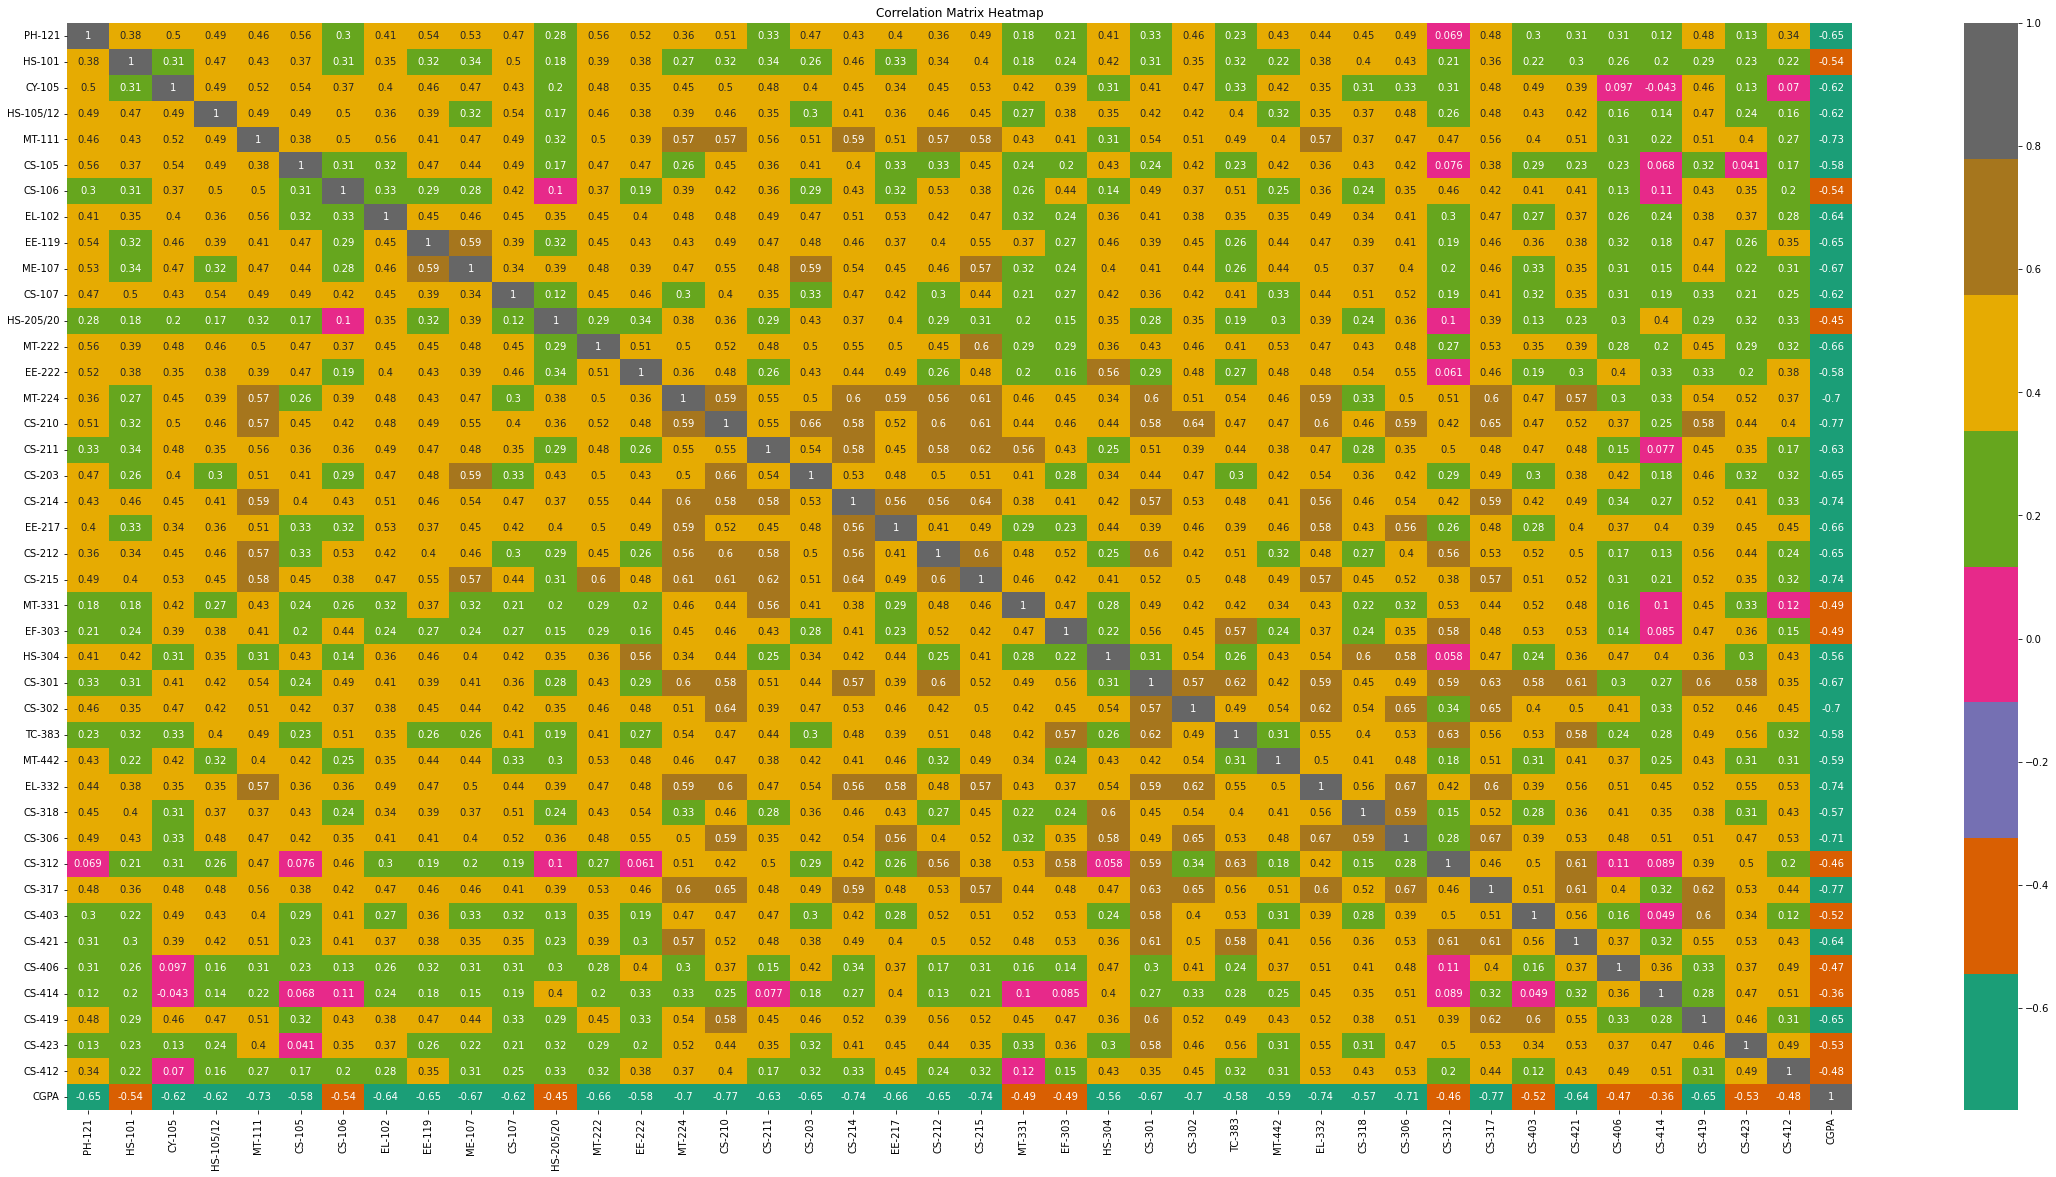

In [207]:
# we will visualize this correlation plotting heatmap
corr = df.corr()

fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(corr, annot=True, cmap='Dark2', ax=ax)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Define Target and Independent Variable

In [208]:
# Define Target and Features variables

target = df['CGPA']
features = df.drop('CGPA', axis=1)

print("Target variable name: ", target.name)
print("Target variable dimensions: ", target.shape)

print("\nFeatures variables names: ", list(features.columns))
print("Features variables dimensions: ", features.shape)

Target variable name:  CGPA
Target variable dimensions:  (571,)

Features variables names:  ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
Features variables dimensions:  (571, 41)


# Feature Scaling

In [209]:
# Feature Scalin using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Scale the features
features_scaled = scaler.fit_transform(features)

# Create a new dataframe with the scaled features
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
print(features_scaled_df)

       PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0    0.592828  0.909091  0.871332   0.500000  0.666667  1.000000  0.947368   
1    0.000000  0.818182  0.954896   0.750000  0.416667  0.787377  0.947368   
2    0.000000  0.272727  0.000000   0.416667  0.333333  0.000000  0.526316   
3    0.848446  0.636364  0.954896   0.750000  0.750000  0.420390  1.000000   
4    0.315584  0.181818  0.425846   0.333333  0.000000  0.000000  0.210526   
5    0.000000  0.454545  0.540567   0.833333  0.583333  0.420390  0.736842   
6    0.592828  0.727273  0.425846   0.750000  0.166667  0.540568  0.000000   
7    0.512798  0.363636  0.822604   0.500000  0.500000  0.420390  0.842105   
8    0.315584  0.545455  0.425846   0.833333  0.250000  0.420390  0.210526   
9    0.000000  0.272727  0.822604   0.250000  0.250000  0.420390  0.631579   
10   0.315584  0.454545  0.630488   0.666667  0.666667  0.717622  0.736842   
11   0.315584  0.545455  0.425846   0.583333  0.666667  0.000000

# VIF (Variance Inflation Factor)

In [210]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# add a constant column to features
features_scaled_df = sm.add_constant(features_scaled_df)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = features_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(features_scaled_df.values, i) for i in range(features_scaled_df.shape[1])]

# Print the VIF dataframe
print(vif)

      Feature        VIF
0       const  11.866248
1      PH-121   2.552275
2      HS-101   1.760284
3      CY-105   2.483331
4   HS-105/12   2.290992
5      MT-111   2.595324
6      CS-105   2.215015
7      CS-106   1.952749
8      EL-102   1.966652
9      EE-119   2.165849
10     ME-107   2.321327
11     CS-107   2.329335
12  HS-205/20   1.650035
13     MT-222   2.291686
14     EE-222   2.255916
15     MT-224   2.800161
16     CS-210   3.154205
17     CS-211   2.673651
18     CS-203   2.647508
19     CS-214   2.687785
20     EE-217   2.422628
21     CS-212   2.757939
22     CS-215   3.016750
23     MT-331   2.117988
24     EF-303   2.135530
25     HS-304   2.523952
26     CS-301   3.072382
27     CS-302   2.779106
28     TC-383   2.867743
29     MT-442   1.992628
30     EL-332   3.228535
31     CS-318   2.341770
32     CS-306   3.496991
33     CS-312   3.235965
34     CS-317   3.164466
35     CS-403   2.436745
36     CS-421   2.732252
37     CS-406   1.887269
38     CS-414   2.122780


As we can see the VIF for all features are in range which is below 5 except constant, since it is not original feature, so we can ignore it

In [211]:
features_scaled_df.columns

Index(['const', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [212]:
# Checking value count of target variable
target.value_counts()

3.0190    5
1.1685    4
3.7720    3
3.4430    3
2.7930    3
2.2060    3
2.7560    3
3.0580    3
3.2260    2
3.3390    2
3.1890    2
3.6510    2
2.9990    2
3.7690    2
2.8800    2
3.9420    2
2.6590    2
3.3340    2
2.3520    2
2.8950    2
3.0100    2
3.0230    2
3.0940    2
3.4810    2
2.0280    2
3.9190    2
2.6120    2
2.9310    2
2.0840    2
3.8760    2
2.3780    2
3.4770    2
3.3350    2
2.7630    2
3.7590    2
3.6070    2
1.9920    2
3.4910    2
3.1370    2
2.3110    2
3.2290    2
3.7140    2
3.4510    2
2.7790    2
2.6050    2
2.4840    2
3.6250    2
2.6030    2
3.3650    2
3.7650    2
3.5230    2
3.4760    2
3.1560    2
2.1880    2
3.1950    2
2.9820    2
3.0680    2
3.7980    2
2.6190    2
3.3690    2
2.9470    2
3.1140    2
3.3320    2
2.0860    2
1.8860    2
2.9180    2
3.0330    2
3.0430    2
3.1640    2
2.3280    2
3.1820    2
2.8510    2
2.5480    1
2.4510    1
2.3210    1
3.7070    1
2.5120    1
3.6180    1
3.6310    1
3.2450    1
2.5740    1
2.4780    1
2.7500    1
1.65

# Best Random State

In [213]:
# Lets find the best random state

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data into training and testing sets using different random states
best_random_state = None
best_r2_score = -1
for random_state in range(100):
    X_train, X_test, y_train, y_test = train_test_split(df.drop('CGPA', axis=1), df['CGPA'], test_size=0.2, random_state=random_state)
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Check if this random state gives a better R2 score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state

print("Best random state:", best_random_state)
print("Best R^2 score:", best_r2_score)

Best random state: 72
Best R^2 score: 0.9718992118356661


Best R^2 score is 0.9718992118356661 on Random State 72

In [214]:
# Lets split the data into test and train data

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=72)

In [215]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(456, 41)
(115, 41)
(456,)
(115,)


# Modelling

In [216]:
# Import necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR

# Linear Regression

In [217]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the linear regression model and fit the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the evaluation metrics
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, lr.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Root squared on test data:", np.sqrt(r2_test))
print("MAE:", mae)
print("MSE:", mse)
print("Root mean square error:", rmse)
print("Root squared on training data:", np.sqrt(r2_train))

Root squared on test data: 0.9858494874146185
MAE: 0.0870259598957524
MSE: 0.011289597057505159
Root mean square error: 0.10625251553495173
Root squared on training data: 0.9568048136872027


R^2 score for test data is 98.5%, that means the linear regression model can be a good fit and can accurately predict the target variable.

These metrics indicate that the linear regression model is performing well on both the training and test sets, with a high R-squared value and low error metrics.

# Lasso Regression (L1)

In [218]:
# Initialize the Lasso Regression model and fit the training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9564103718468308
MAE on test data: 0.10778470183221237
MSE on test data: 0.017512296625201363
RMSE on test data: 0.13233403426632684
Root squared on training data: 0.8865883887021747


R^2 score for test data is 95.6%, that mean this lasso model can be a good fit for the prediction of target variable.

# Ridge Regression(L2)

In [219]:
# Initialize the Ridge Regression model and fit the training data 
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

# Make prediction on both test and train data
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9718997820819665
MAE on test data: 0.08702514368048112
MSE on test data: 0.011289367958914815
RMSE on test data: 0.10625143744399328
Root squared on training data: 0.9154754514657671


R^2 score of test data in this model is 97.18%, that mean it can be quite fitted model for further prediction

# ElasticNet

In [220]:
# Initialize the Elastic Net Regression model and fit the training data
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9664326763594631
MAE on test data: 0.09264702993339159
MSE on test data: 0.013485798191294645
RMSE on test data: 0.11612836945077049
Root squared on training data: 0.8976272829203233


R^2 score of test data is this model is 96.6%, that means it is a good fitted model for prediction

# DecisionTreeRegression

In [221]:
# Initialize the Decision Tree Regression model and fit the training data
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = dtr_model.predict(X_train)
y_test_pred = dtr_model.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.8344592497570991
MAE on test data: 0.19251304347826084
MSE on test data: 0.06650661739130434
RMSE on test data: 0.25788876941678623
Root squared on training data: 1.0


R^2 score of test data is 83.4% that means this model performed ok for prediction but not accurately as its R^2 score of train data is 1.0 as it could be an indication of overfitting 

# Random Forest Regression

In [222]:
# Initialize the Random Forest Regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=72)
rf.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9451166009668808
MAE on test data: 0.11018826086956501
MSE on test data: 0.022049611441739073
RMSE on test data: 0.14849111569969117
Root squared on training data: 0.9877110804787326


R^2 score of this model in the test data is 94.5% that means it performed well and can be a good model for prediction

# Gradient Boosting Regression

In [223]:
# Initialize the Gradient Boosting Regression model and fit the training data
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=72)
gbr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9717300234211903
MAE on test data: 0.07935271389642803
MSE on test data: 0.011357569137685236
RMSE on test data: 0.10657189656605176
Root squared on training data: 0.9953143741983698


R^2 score of this model for test data is 97.1%, that means, it performed well and can be a good model for prediction

# XGBoost (XGB)

In [224]:
# Initialize the XGBoost Regression model and fit the training data
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9658589611606434
MAE on test data: 0.09242466538470724
MSE on test data: 0.013716290424557407
RMSE on test data: 0.1171165676774956
Root squared on training data: 0.9974746758633313


R^2 score of this model is 96.6%, that means it performed well and can be good fit for prediction

# Support Vector Regression (SVR)

In [225]:
# Initialize an SVR model with a linear kernel
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

# Make predictions using the trained model for both test and train data
y_test_pred = svr_model.predict(X_test)
y_train_pred = svr_model.predict(X_train)

# Calculate R-Squared for both train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9834982084110868
MAE on test data: 0.06572200456180029
MSE on test data: 0.006629656672840633
RMSE on test data: 0.08142270366943506
Root squared on training data: 0.8981860031485042


R^2 score of this model for test data is 98.3%, that means it performed quite well and can be a good fitted model for prediction

# KNeighbors Regression

In [226]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the kneighbors model
knr_model = KNeighborsRegressor(n_neighbors=5)
knr_model.fit(X_train, y_train)

# Make predictions using the trained model for both test and train data
y_test_pred = knr_model.predict(X_test)
y_train_pred = knr_model.predict(X_train)

# Calculate R-Squared for both train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9726160130562235
MAE on test data: 0.08205217391304347
MSE on test data: 0.011001619478260866
RMSE on test data: 0.10488860509254981
Root squared on training data: 0.9101750020490317


R^2 score of this model for test data is 97.2%, that means, it performed well and can be the good fit for the prediction

# Cross Validation Score

In [227]:
# Import Necessary Library

from sklearn.model_selection import cross_val_score

# Linear Regression CV score

In [228]:
# Initialize the linear regression model and fit the training data
lr = LinearRegression()

# Perform cross-validation on the model
cv_scores = cross_val_score(lr, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [0.87923444 0.93464664 0.90089659 0.93540702 0.84876674]
Mean of CV Scores:  0.8997902853426707
Difference between R2 score and mean CV score:  0.07210892649299538


# Lasso CV score

In [229]:
# Initialize the Lasso model
lasso = Lasso()

# Perform cross-validation on the model
cv_scores = cross_val_score(lasso, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [0.3435142  0.33872666 0.33546802 0.37124783 0.29616284]
Mean of CV Scores:  0.33702390916216673
Difference between R2 score and mean CV score:  0.015989670888886698


# Ridge CV score

In [230]:
# Initialize the Ridge regression model and fit the training data
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(ridge, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.87924986 0.9347116  0.90100006 0.93550232 0.84872221]
Mean of CV Scores:  0.8998372098800435
Difference between R2 score and mean CV score:  0.0721184378040216


# ElasticNet CV score

In [231]:
# Initialize the ElasticNet regression model and fit the training data
enet = ElasticNet(alpha=1.0, l1_ratio=0.5)
enet.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(enet, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = enet.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.73286845 0.74738813 0.7394159  0.78396506 0.63485789]
Mean of CV Scores:  0.7276990873051958
Difference between R2 score and mean CV score:  0.06885305410747433


# Decision Tree Regression CV score

In [232]:
# Initialize the decision tree regression model with max depth 5
dtr = DecisionTreeRegressor(max_depth=5)

# Perform cross-validation on the model
cv_scores = cross_val_score(dtr, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
dtr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.73401248 0.81012124 0.90550343 0.81522249 0.69588275]
Mean of CV Scores:  0.7921484773056465
Difference between R2 score and mean CV score:  0.052306483359433886


# Random Forest Regression CV score

In [233]:
# Initialize the random forest regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(rf, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.90371874 0.9252197  0.94418114 0.92281158 0.8781832 ]
Mean of CV Scores:  0.9148228714617744
Difference between R2 score and mean CV score:  0.03184375194408362


# Gradient Boosting Regression CV score

In [234]:
# Initialize the Gradient Boosting Regression model with default parameters
gbr = GradientBoostingRegressor()

# Perform cross-validation on the model
cv_scores = cross_val_score(gbr, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.92259051 0.96708306 0.94908155 0.95164866 0.89736585]
Mean of CV Scores:  0.9375539264066065
Difference between R2 score and mean CV score:  0.03359640728957136


# XGBOOST Regression CV score

In [235]:
import xgboost as xgb

# Initialize the XGBoost regression model
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)

# Perform cross-validation on the model
cv_scores = cross_val_score(xgb, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Calculate the difference between the R2 score and mean CV score
diff = r2 - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.90701019 0.95302274 0.94916289 0.94377816 0.90729612]
Mean of CV Scores:  0.9320540223443372
Difference between R2 score and mean CV score:  0.033804938816306196


# Support Vector Regression CV score

In [236]:
# Initialize a Support Vector Regressor model
svr_model = SVR()

# Perform cross-validation on the model
cv_scores = cross_val_score(svr_model, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr_model.predict(X_test)

# Calculate the R2 score for the model
r2 = svr_model.score(X_test, y_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2 - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.87731065 0.92940453 0.92615631 0.95226536 0.8537104 ]
Mean of CV Scores:  0.9077694496974524
Difference between R2 score and mean CV score:  0.06816647329708792


# KNeighbors CV score

In [237]:
# Initialize a KNeighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Perform cross-validation on the model
cv_scores = cross_val_score(knn_model, features, target, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Calculate the R2 score for the model
r2 = r2_score(y_test, y_pred)

# Calculate the difference between the R2 score and mean CV score
diff = r2 - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.87363573 0.86119765 0.88359833 0.94947009 0.81592063]
Mean of CV Scores:  0.8767644854429907
Difference between R2 score and mean CV score:  0.09585152761323279


Based on the difference between R2 score and mean CV score , we can see that the Lasso Regression(L1) is the best performing model in this case. The smaller the difference, the better the model's generalization performance.

Lasso Regression(L1) is the best fitted and performing model.

Now perform hyperparametertuning for more accuracy.

# Hyperparameter Tuning

In [238]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Initialize a Lasso regression model
lasso_model = Lasso()

# Define the hyperparameters to tune
hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1],
                   'max_iter': [100, 500, 1000, 5000],
                   'fit_intercept': [True, False],
                   'normalize': [True, False],
                   'selection': ['cyclic', 'random']}

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(lasso_model, hyperparameters, cv=5, scoring='r2')

# Fit the GridSearchCV object on the scaled data
grid_search.fit(scaled_features, target)

# Print the best hyperparameters and best score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best hyperparameters:  {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 500, 'normalize': False, 'selection': 'cyclic'}
Best R2 score:  0.9011770573384498


In [239]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=72)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Lasso model with the best hyperparameters
lasso = Lasso(alpha=0.01, fit_intercept=True, max_iter=1000, normalize=False, selection='random')

# Fit the model to the training data
lasso.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.9759694971024868
Mean Absolute Error: 0.07922256311528389
Mean Squared Error: 0.009654344682988873
Root Mean Squared Error: 0.0982565248876067


R^2 score of lasso model for test data is now increased to 97.5% earlier  it was 95.6%.

Therefore Lasso(L1) is the best performing and fitted model for this problem.

# Save the Model

In [240]:
# Saving model for the prediction of unseen data

import joblib

# Train the Lasso model
lasso_model = Lasso(alpha=0.001, fit_intercept=True, max_iter=100, normalize=False, selection='cyclic')
lasso_model.fit(X_train, y_train)

# Save the model using joblib
joblib.dump(lasso_model, 'CGPA_prediction_model.joblib')

['CGPA_prediction_model.joblib']